# Earnings by Gender EDA

This is an ultra-wide dataset(three wide datasets side-by-side). Below are the steps we'll be taking:
- Shorten long column names.
- Separate out the three wide datasets.
- Convert each of the three to long format and prepare one final tidy dataset.
- EDA with grouped aggregate measures.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(INSERT PATH FOR YOUR COMPUTER, sep=';') 
df.head()

,year,females,femalesmanagers,femaleprofessionals,femaletechniciansandtradesworkers,femalecommunityandpersonalserviceworkers,femaleclericalandadministrativeworkers,femalesalesworkers,femalemachineryoperatorsanddrivers,femalelabourers,...,malelabourers,persons,personmanagers,personprofessionals,persontechniciansandtradesworkers,personcommunityandpersonalserviceworkers,personclericalandadministrativeworkers,personsalesworkers,personmachineryoperatorsanddrivers,personlabourers
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,...,17.21,Persons,30.60,31.22,21.58,19.03,20.80,16.13,20.39,16.95
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,...,17.85,Persons,31.37,31.91,21.42,19.60,21.71,16.70,21.09,17.44
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,...,18.18,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.00,17.48
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,...,19.68,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,...,19.79,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85


In [5]:
df.columns

Index(['year', 'females', 'femalesmanagers', 'femaleprofessionals',
       'femaletechniciansandtradesworkers',
       'femalecommunityandpersonalserviceworkers',
       'femaleclericalandadministrativeworkers', 'femalesalesworkers',
       'femalemachineryoperatorsanddrivers', 'femalelabourers', 'males',
       'malemanagers', 'maleprofessionals', 'maletechniciansandtradesworkers',
       'malecommunityandpersonalserviceworkers',
       'maleclericalandadministrativeworkers', 'malesalesworkers',
       'malemachineryoperatorsanddrivers', 'malelabourers', 'persons',
       'personmanagers', 'personprofessionals',
       'persontechniciansandtradesworkers',
       'personcommunityandpersonalserviceworkers',
       'personclericalandadministrativeworkers', 'personsalesworkers',
       'personmachineryoperatorsanddrivers', 'personlabourers'],
      dtype='object')

In [6]:
#New names for all the columns
new_col_names = ['year', 'females', 'fmgr', 'fprof',
       'ftechtradesw',
       'fcommprsnlsvcw',
       'fclrcadminw', 'fsalesw',
       'foprdrvr', 'flab', 'males',
       'mmgr', 'mprof', 'mtechtradesw',
       'mcommprsnlsvcw',
       'mclrcadminw', 'msalesw',
       'moprdrvr', 'mlab', 'persons',
       'pmgr', 'pprof',
       'ptechtradesw',
       'pcommprsnlsvcw',
       'pclrcadminw', 'psalesw',
       'poprdrvr', 'plab']

In [7]:
#Create a dictionary to map old names to new names.
name_map = dict(zip(new_col_names,list(df.columns)))

In [8]:
name_map

{'year': 'year',
 'females': 'females',
 'fmgr': 'femalesmanagers',
 'fprof': 'femaleprofessionals',
 'ftechtradesw': 'femaletechniciansandtradesworkers',
 'fcommprsnlsvcw': 'femalecommunityandpersonalserviceworkers',
 'fclrcadminw': 'femaleclericalandadministrativeworkers',
 'fsalesw': 'femalesalesworkers',
 'foprdrvr': 'femalemachineryoperatorsanddrivers',
 'flab': 'femalelabourers',
 'males': 'males',
 'mmgr': 'malemanagers',
 'mprof': 'maleprofessionals',
 'mtechtradesw': 'maletechniciansandtradesworkers',
 'mcommprsnlsvcw': 'malecommunityandpersonalserviceworkers',
 'mclrcadminw': 'maleclericalandadministrativeworkers',
 'msalesw': 'malesalesworkers',
 'moprdrvr': 'malemachineryoperatorsanddrivers',
 'mlab': 'malelabourers',
 'persons': 'persons',
 'pmgr': 'personmanagers',
 'pprof': 'personprofessionals',
 'ptechtradesw': 'persontechniciansandtradesworkers',
 'pcommprsnlsvcw': 'personcommunityandpersonalserviceworkers',
 'pclrcadminw': 'personclericalandadministrativeworkers',
 '

In [9]:
df.columns = new_col_names
df

,year,females,fmgr,fprof,ftechtradesw,fcommprsnlsvcw,fclrcadminw,fsalesw,foprdrvr,flab,...,mlab,persons,pmgr,pprof,ptechtradesw,pcommprsnlsvcw,pclrcadminw,psalesw,poprdrvr,plab
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48,...,17.21,Persons,30.60,31.22,21.58,19.03,20.80,16.13,20.39,16.95
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71,...,17.85,Persons,31.37,31.91,21.42,19.60,21.71,16.70,21.09,17.44
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32,...,18.18,Persons,32.82,32.28,22.18,20.04,22.82,17.57,21.00,17.48
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54,...,19.68,Persons,37.95,35.01,23.52,21.32,24.61,18.28,22.55,18.88
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27,...,19.79,Persons,36.24,35.84,24.19,24.25,24.76,19.34,23.33,18.85
5,2009,Females,33.30,34.72,20.19,21.00,23.81,18.02,21.46,17.90,...,19.96,Persons,38.57,37.10,25.68,22.25,24.93,19.38,25.05,19.21
6,2010,Females,34.41,35.52,22.86,21.97,25.74,19.15,22.74,19.18,...,21.69,Persons,38.73,38.14,27.23,23.50,27.04,20.58,26.82,20.83
7,2011,Females,35.22,36.48,23.19,23.25,26.85,19.87,22.92,19.82,...,22.16,Persons,40.62,40.65,28.42,24.26,28.31,21.41,26.74,21.32
8,2012,Females,36.24,37.72,23.95,23.52,28.35,20.82,24.46,20.99,...,24.18,Persons,41.28,41.07,29.90,25.25,29.47,22.16,28.52,22.99
9,2013,Females,37.26,38.95,23.90,24.50,28.38,21.61,25.02,21.75,...,24.25,Persons,41.99,41.66,29.81,25.88,29.84,22.67,29.36,23.32


## Unpivoting the dataset

This is actually three wide datasets side-by-side; we need to separate them.  
Next, we unpivot each of these three datasets  
Lastly, we concatenate all of them to make a long tidy dataset.

In [11]:
#Split the ultra wide dataset into three wide datasets.
#femaledf = ['year','females','fmgr','fprof','ftechtradesw','fcommprsnlsvcw','fclrcadminw','fsalesw','foprdrvr','flab'] etc
femaledf = df.iloc[:,:10]
maledf = df.iloc[:,[0]+list(range(10,19))]
personsdf = df.iloc[:,[0]+list(range(19,28))]

In [12]:
femaledf

,year,females,fmgr,fprof,ftechtradesw,fcommprsnlsvcw,fclrcadminw,fsalesw,foprdrvr,flab
0,2004,Females,26.14,29.02,17.90,18.01,19.98,14.79,16.27,16.48
1,2005,Females,28.10,30.00,18.86,18.20,20.95,15.39,21.49,16.71
2,2006,Females,28.60,30.56,19.64,18.84,21.73,16.19,17.37,16.32
3,2007,Females,36.43,31.93,20.98,19.85,23.27,16.78,18.04,17.54
4,2008,Females,32.68,32.93,20.30,20.97,23.67,17.44,20.27,17.27
5,2009,Females,33.30,34.72,20.19,21.00,23.81,18.02,21.46,17.90
6,2010,Females,34.41,35.52,22.86,21.97,25.74,19.15,22.74,19.18
7,2011,Females,35.22,36.48,23.19,23.25,26.85,19.87,22.92,19.82
8,2012,Females,36.24,37.72,23.95,23.52,28.35,20.82,24.46,20.99
9,2013,Females,37.26,38.95,23.90,24.50,28.38,21.61,25.02,21.75


In [13]:
#Now unpivot this dataset.
femaledf.rename(columns={'females':'gender'}, inplace=True)

In [14]:
femaledf_long = femaledf.melt(id_vars=['year','gender'], var_name='job', value_name='salary')

In [15]:
#Now unpivot this dataset.
maledf = maledf.rename(columns={'males':'gender'})

In [16]:
maledf_long = maledf.melt(id_vars=['year','gender'], var_name='job', value_name='salary')

In [17]:
personsdf = personsdf.rename(columns={'persons':'gender'})

In [18]:
personsdf_long = personsdf.melt(id_vars=['year','gender'], var_name='job', value_name='salary')

In [19]:
femaledf_long

,year,gender,job,salary
0,2004,Females,fmgr,26.14
1,2005,Females,fmgr,28.10
2,2006,Females,fmgr,28.60
3,2007,Females,fmgr,36.43
4,2008,Females,fmgr,32.68
...,...,...,...,...
107,2013,Females,flab,21.75
108,2014,Females,flab,22.64
109,2015,Females,flab,23.66
110,2016,Females,flab,24.19


In [20]:
maledf_long

,year,gender,job,salary
0,2004,Males,mmgr,33.02
1,2005,Males,mmgr,33.13
2,2006,Males,mmgr,35.16
3,2007,Males,mmgr,38.85
4,2008,Males,mmgr,38.34
...,...,...,...,...
107,2013,Males,mlab,24.25
108,2014,Males,mlab,25.22
109,2015,Males,mlab,24.73
110,2016,Males,mlab,25.64


In [21]:
personsdf_long

,year,gender,job,salary
0,2004,Persons,pmgr,30.60
1,2005,Persons,pmgr,31.37
2,2006,Persons,pmgr,32.82
3,2007,Persons,pmgr,37.95
4,2008,Persons,pmgr,36.24
...,...,...,...,...
107,2013,Persons,plab,23.32
108,2014,Persons,plab,24.29
109,2015,Persons,plab,24.36
110,2016,Persons,plab,25.14


Now that we have got all dataframes in the long format, let us combine them to make one dataframe which we can use for our EDA. We can pivot this dataframe as necessary.

We also need to change the `job` feature to make it uniform across all genders.

In [23]:
finaldf = pd.concat([femaledf_long,maledf_long,personsdf_long], axis=0)
finaldf.reset_index(inplace=True, drop=True)

finaldf['job'] = finaldf['job'].map(lambda w: w[1:])

In [24]:
finaldf

,year,gender,job,salary
0,2004,Females,mgr,26.14
1,2005,Females,mgr,28.10
2,2006,Females,mgr,28.60
3,2007,Females,mgr,36.43
4,2008,Females,mgr,32.68
...,...,...,...,...
331,2013,Persons,lab,23.32
332,2014,Persons,lab,24.29
333,2015,Persons,lab,24.36
334,2016,Persons,lab,25.14


The final data frame is ready. Below, we save the cleaned data incase we want to use it in the future. The data will be saved to the current directory(where the current Jupyter Notebook is running)

In [26]:
finaldf.to_csv('earnings_final.csv', index=False)

In [27]:
# Check the data types of each column
finaldf.dtypes

year        int64
gender     object
job        object
salary    float64
dtype: object

In [28]:
# sort descending on median
finaldf.groupby('job')['salary'].describe().sort_values(by='50%',ascending=False)

,count,mean,std,min,25%,50%,75%,max
job,,,,,,,,
prof,42.0,39.933810,6.612107,29.02,34.4350,39.175,45.2225,52.91
mgr,42.0,39.511429,6.624056,26.14,34.5975,38.790,44.3225,52.51
clrcadminw,42.0,28.504762,5.044831,19.98,24.1075,28.330,32.6575,39.40
techtradesw,42.0,26.100952,4.524372,17.90,22.2950,25.980,29.8775,34.25
oprdrvr,42.0,25.552143,4.542781,16.27,21.4675,25.245,29.7125,33.12
commprsnlsvcw,42.0,24.827143,4.118990,18.01,21.4825,24.530,27.6700,33.35
salesw,42.0,21.444286,3.741879,14.79,18.6350,21.505,23.8900,29.62
lab,42.0,21.063571,3.201759,16.32,17.9700,20.910,24.1875,27.28


# Average salary over the years

In [30]:
avg_salary_year = finaldf.groupby('year')['salary'].mean().reset_index()
print("Average salary over the years:")
avg_salary_year

Average salary over the years:


,year,salary
0,2004,21.895833
1,2005,22.687500
2,2006,23.166667
3,2007,25.218750
4,2008,25.847500
5,2009,26.305417
6,2010,27.708333
7,2011,28.780417
8,2012,29.857917
9,2013,30.346250


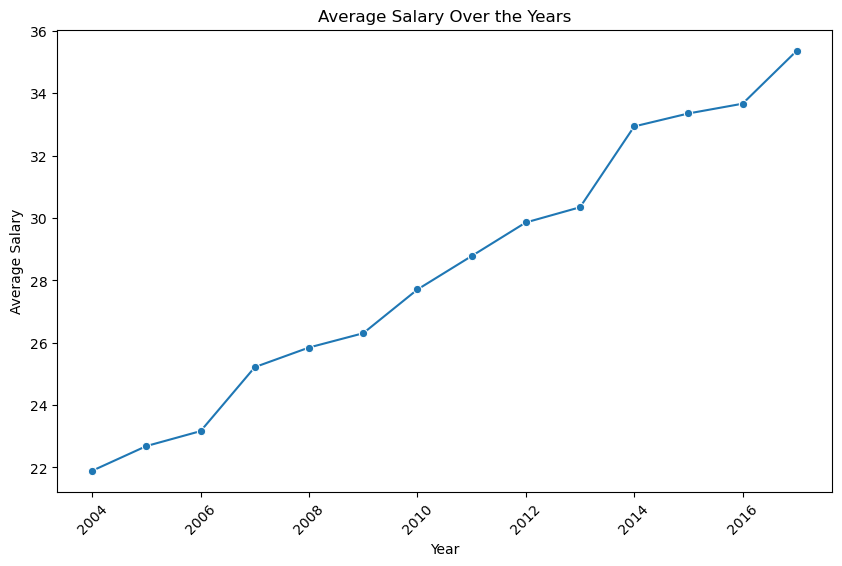

In [31]:
avg_salary_year = finaldf.groupby('year')['salary'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_salary_year, x='year', y='salary', marker='o')
plt.title('Average Salary Over the Years')
plt.ylabel('Average Salary')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

# Salary distribution by gender

In [33]:
gender_salary_distribution = finaldf.groupby('gender')['salary'].describe()
print("\nSalary distribution by gender:")
gender_salary_distribution


Salary distribution by gender:


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Females,112.0,26.054375,7.767411,14.79,20.2500,23.855,30.1925,47.04
Males,112.0,30.590268,8.845991,17.21,23.9625,29.115,34.2725,52.91
Persons,112.0,28.457143,8.295309,16.13,22.1750,26.780,32.5925,49.80


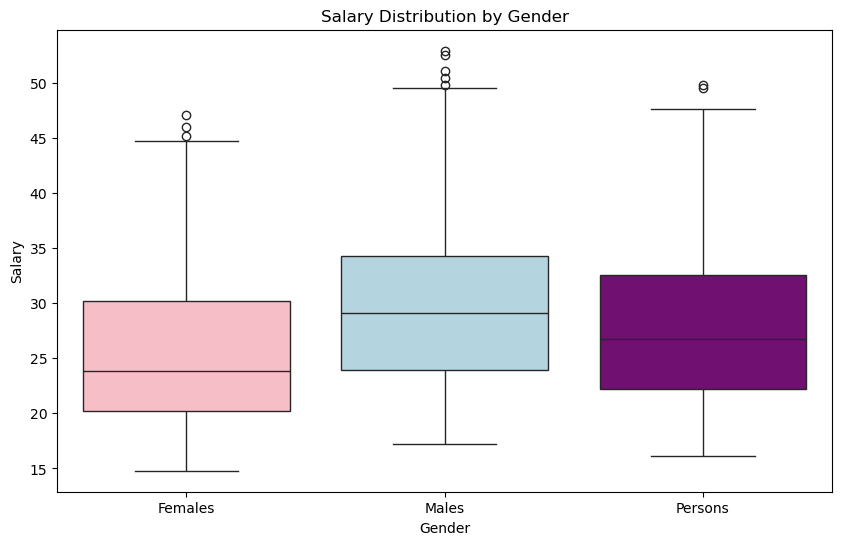

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='salary', data=finaldf, hue='gender', palette={'Females': 'lightpink','Males': 'lightblue', 'Persons': 'purple'})
plt.title('Salary Distribution by Gender')
plt.ylabel('Salary')
plt.xlabel('Gender')
plt.show()

Taking a closer look

# Box plots of salary distribution across various genders and jobs.

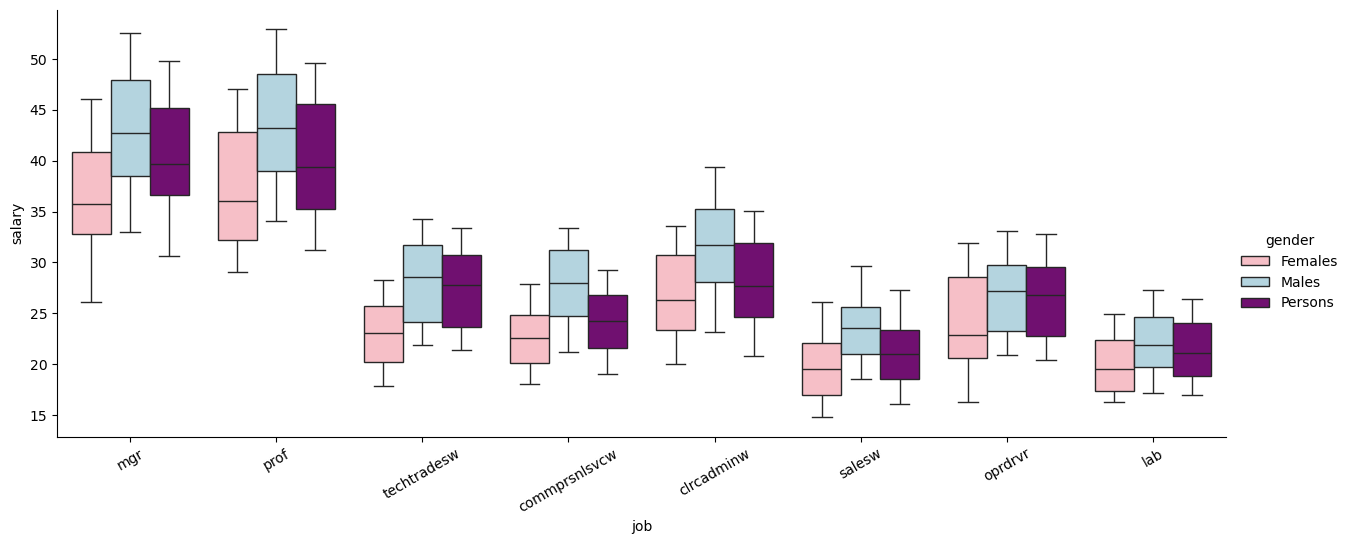

In [37]:
c = sns.catplot(data=finaldf, x='job', y='salary', hue='gender',palette={'Females': 'lightpink','Males': 'lightblue', 'Persons': 'purple'}, kind='box', aspect=2.5)
c.set_xticklabels(rotation=30)

# Salary trends over the years by gender
Is there a time trend in salaries (by gender)?

In [39]:
avg_salary_year_gender = finaldf.groupby(['year', 'gender'])['salary'].mean().unstack()
print("\nAverage salary over the years by gender:")
avg_salary_year_gender


Average salary over the years by gender:


gender,Females,Males,Persons
year,,,
2004,19.82375,23.77625,22.08750
2005,21.21250,24.19500,22.65500
2006,21.15625,25.07000,23.27375
2007,23.10250,27.28875,25.26500
2008,23.19125,28.50125,25.85000
2009,23.80000,28.59500,26.52125
2010,25.19625,30.07000,27.85875
2011,25.95000,31.42500,28.96625
2012,27.00625,32.48750,30.08000


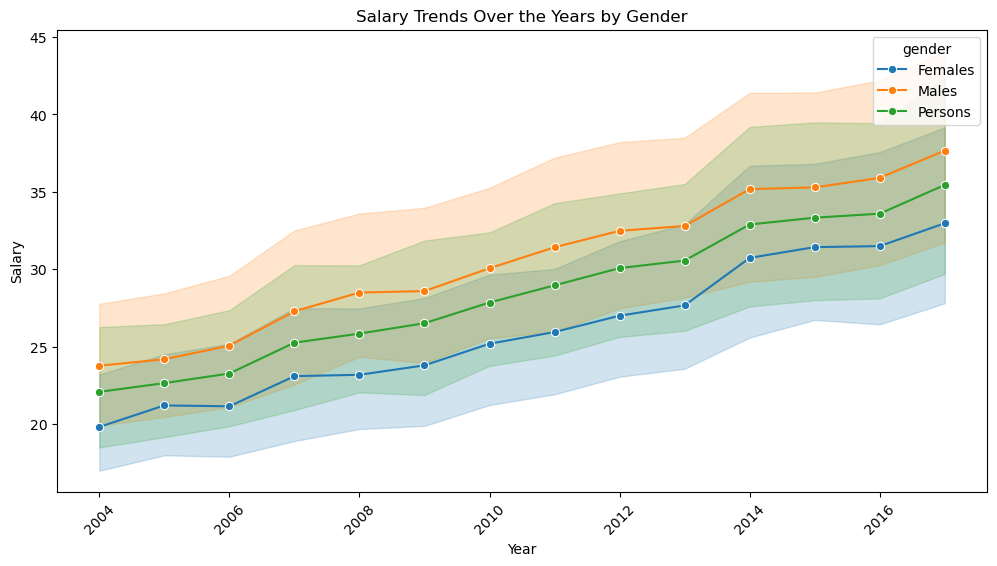

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=finaldf, x='year', y='salary', hue='gender', marker='o')
plt.title('Salary Trends Over the Years by Gender')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

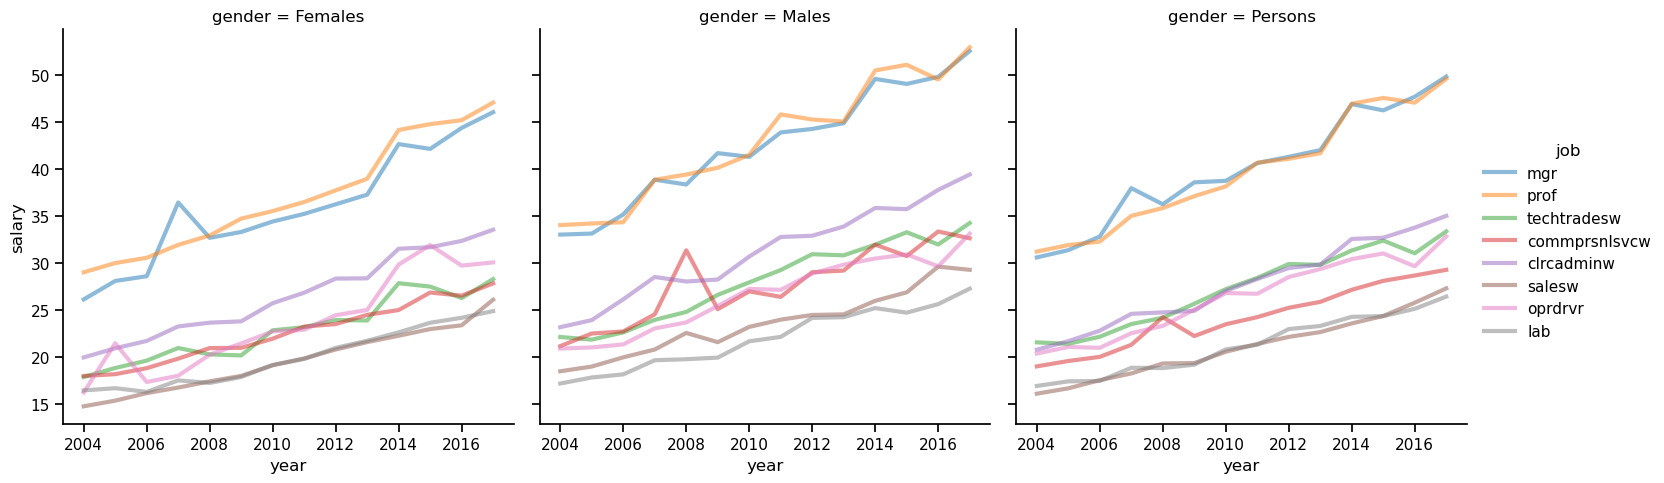

In [41]:
sns.set_context('notebook' ,rc={"lines.linewidth": 3})
sns.relplot(data=finaldf,x='year',y='salary',hue='job', kind='line',col='gender',alpha=0.5)

# Regression line

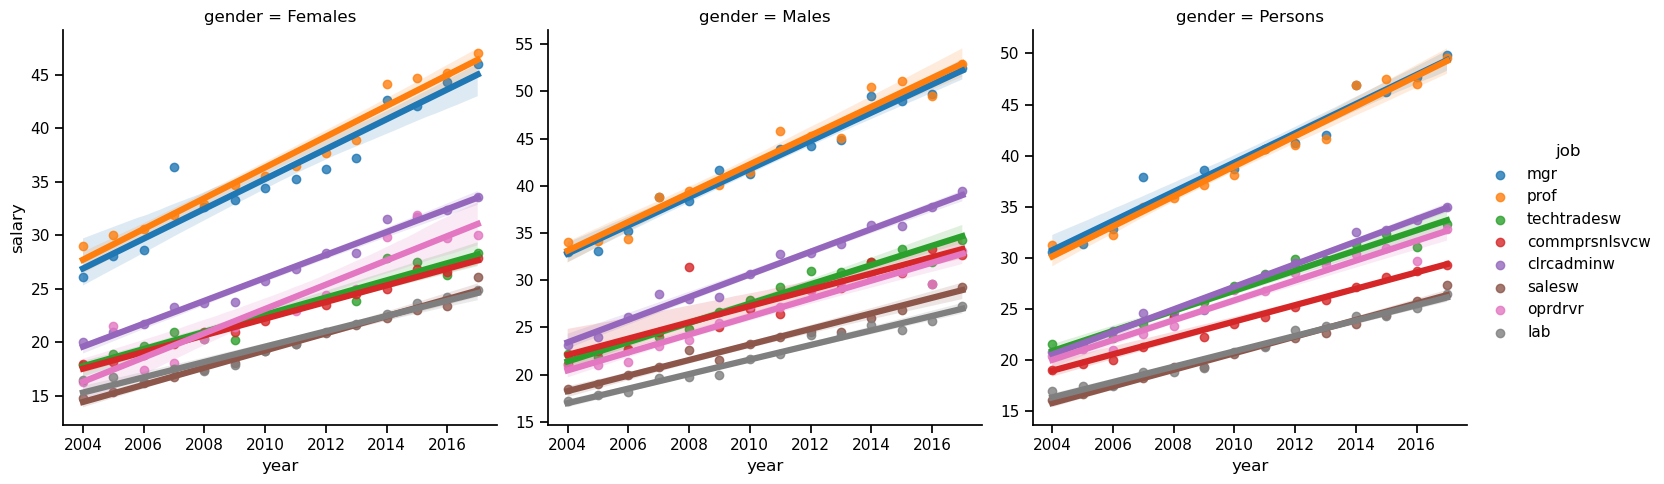

In [43]:
sns.lmplot(data=finaldf, x='year', y='salary', 
           hue='job',
           col='gender',
           fit_reg=True, 
           lowess=False, 
           facet_kws={'sharey': False}) 

# Salary distribution across different jobs

In [45]:
job_salary_distribution = finaldf.groupby('job')['salary'].describe()
print("\nSalary distribution across different jobs:")
job_salary_distribution


Salary distribution across different jobs:


,count,mean,std,min,25%,50%,75%,max
job,,,,,,,,
clrcadminw,42.0,28.504762,5.044831,19.98,24.1075,28.330,32.6575,39.40
commprsnlsvcw,42.0,24.827143,4.118990,18.01,21.4825,24.530,27.6700,33.35
lab,42.0,21.063571,3.201759,16.32,17.9700,20.910,24.1875,27.28
mgr,42.0,39.511429,6.624056,26.14,34.5975,38.790,44.3225,52.51
oprdrvr,42.0,25.552143,4.542781,16.27,21.4675,25.245,29.7125,33.12
prof,42.0,39.933810,6.612107,29.02,34.4350,39.175,45.2225,52.91
salesw,42.0,21.444286,3.741879,14.79,18.6350,21.505,23.8900,29.62
techtradesw,42.0,26.100952,4.524372,17.90,22.2950,25.980,29.8775,34.25


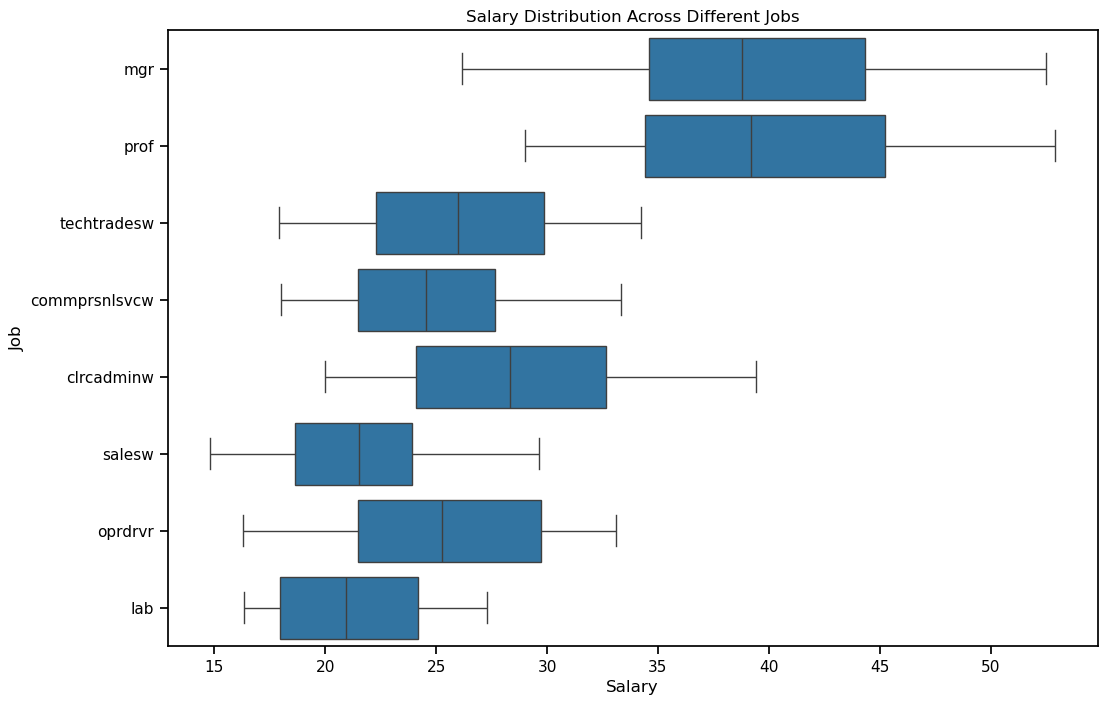

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='salary', y='job', data=finaldf)
plt.title('Salary Distribution Across Different Jobs')
plt.xlabel('Salary')
plt.ylabel('Job')
plt.show()

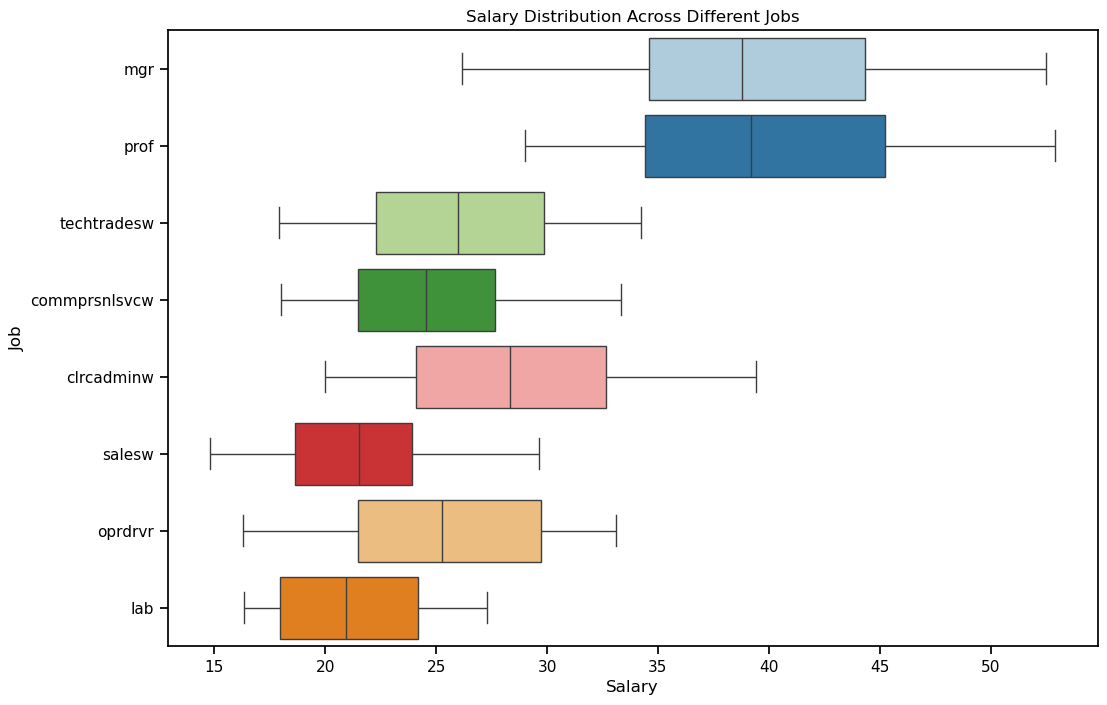

In [47]:
unique_jobs = finaldf['job'].unique()
palette = sns.color_palette("Paired", len(unique_jobs)) 
job_palette = dict(zip(unique_jobs, palette))

plt.figure(figsize=(12, 8))
sns.boxplot(x='salary', y='job', data=finaldf, palette=job_palette, hue='job')
plt.title('Salary Distribution Across Different Jobs')
plt.xlabel('Salary')
plt.ylabel('Job')
plt.show()

# Does gender influence salary?

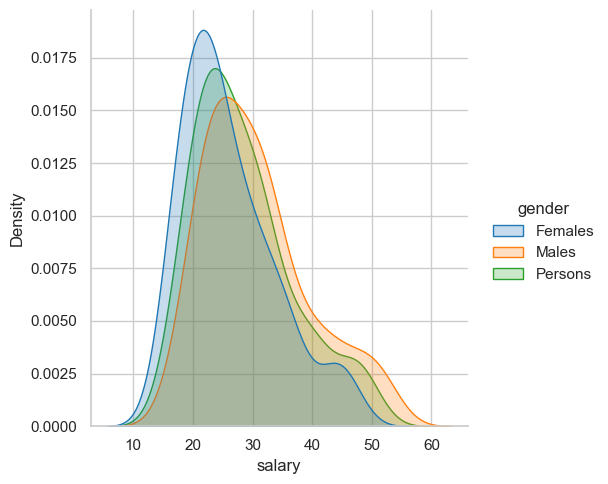

In [49]:
sns.set_style("whitegrid")
sns.displot(data=finaldf, x="salary", hue='gender', kind="kde",bw_adjust=1.0,fill=True  )

# Does profession/job influence salary?

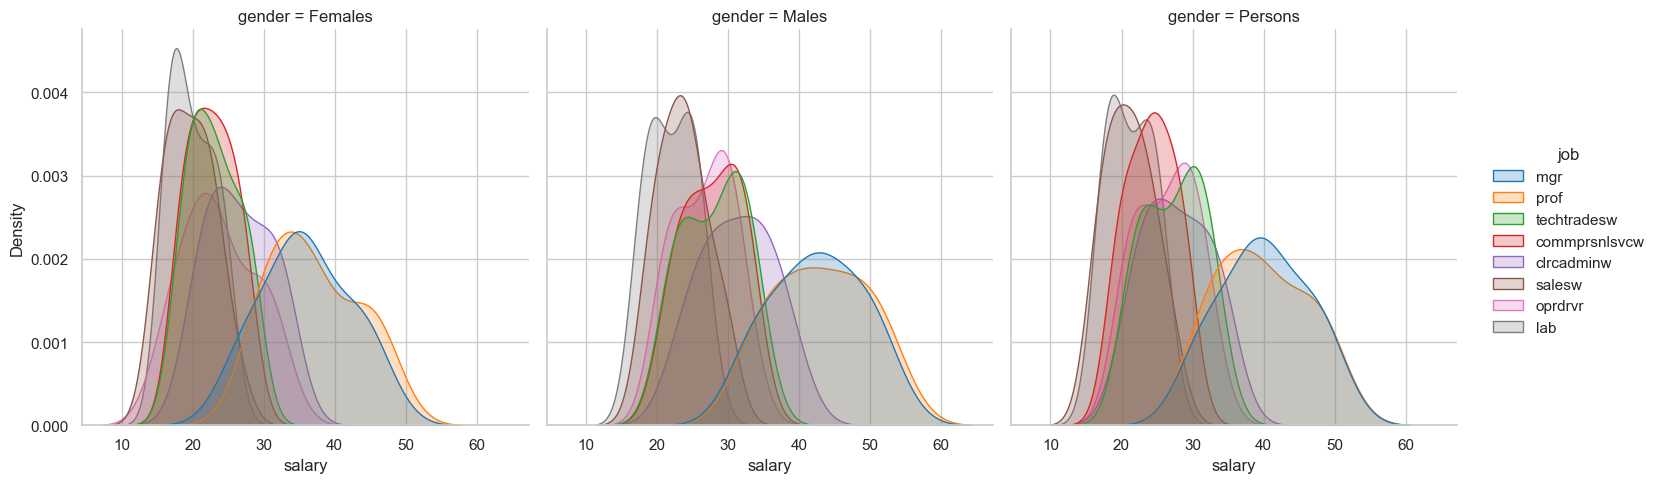

In [51]:
sns.set_style("whitegrid")
sns.displot(data=finaldf, x="salary", hue='job',col='gender', kind="kde",bw_adjust=1.0,fill=True  )

# Taking a look at paygap (if any)

In [53]:
gender_pay_gap = finaldf.groupby(['job', 'gender'])['salary'].mean().unstack()
gender_pay_gap['Pay Gap'] = gender_pay_gap['Males'] - gender_pay_gap['Females']
print("\nGender pay gap by job (Male - Female):")
print(gender_pay_gap[['Males', 'Females', 'Pay Gap']])


Gender pay gap by job (Male - Female):
gender             Males    Females   Pay Gap
job                                          
clrcadminw     31.219286  26.558571  4.660714
commprsnlsvcw  27.697143  22.597857  5.099286
lab            21.987143  19.953571  2.033571
mgr            42.518571  35.964286  6.554286
oprdrvr        26.629286  23.685000  2.944286
prof           43.027143  37.065714  5.961429
salesw         23.610000  19.630714  3.979286
techtradesw    28.033571  22.979286  5.054286


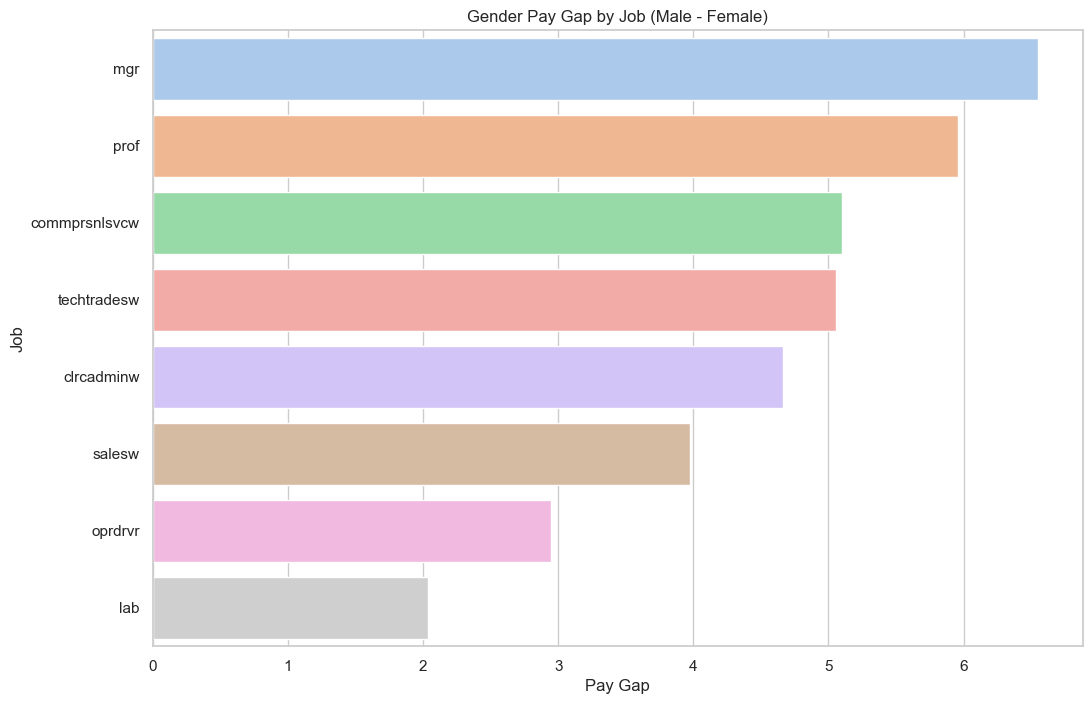

In [54]:
gender_pay_gap = finaldf.groupby(['job', 'gender'])['salary'].mean().unstack()
gender_pay_gap['Pay Gap'] = gender_pay_gap['Males'] - gender_pay_gap['Females']
gender_pay_gap = gender_pay_gap.sort_values('Pay Gap', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Pay Gap', y=gender_pay_gap.index, data=gender_pay_gap.reset_index(), hue='job', palette="pastel", dodge=False)
plt.title('Gender Pay Gap by Job (Male - Female)')
plt.xlabel('Pay Gap')
plt.ylabel('Job')
plt.show()

# Male vs Female Salaries by Job

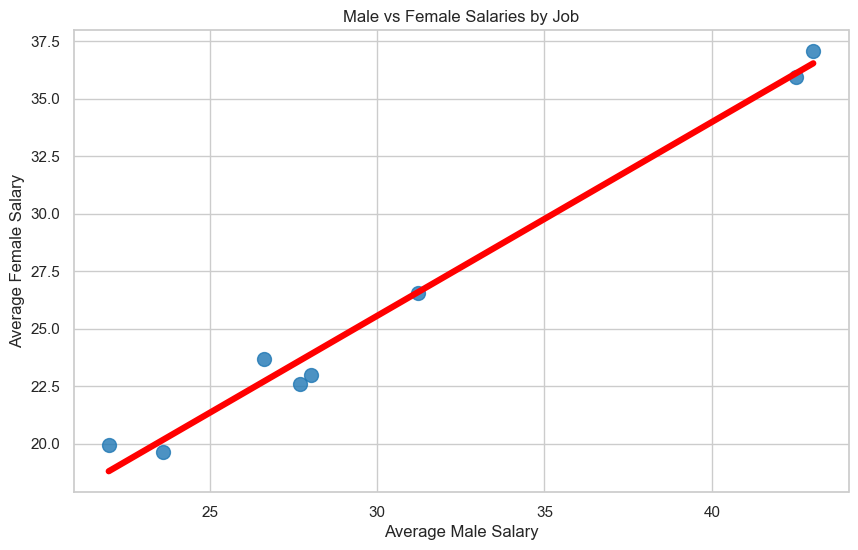

In [56]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Males', 
    y='Females', 
    data=gender_pay_gap, 
    scatter_kws={'s': 100}, 
    line_kws={'color': 'red'}, 
    ci=None  
)
plt.title('Male vs Female Salaries by Job')
plt.xlabel('Average Male Salary')
plt.ylabel('Average Female Salary')
plt.show()

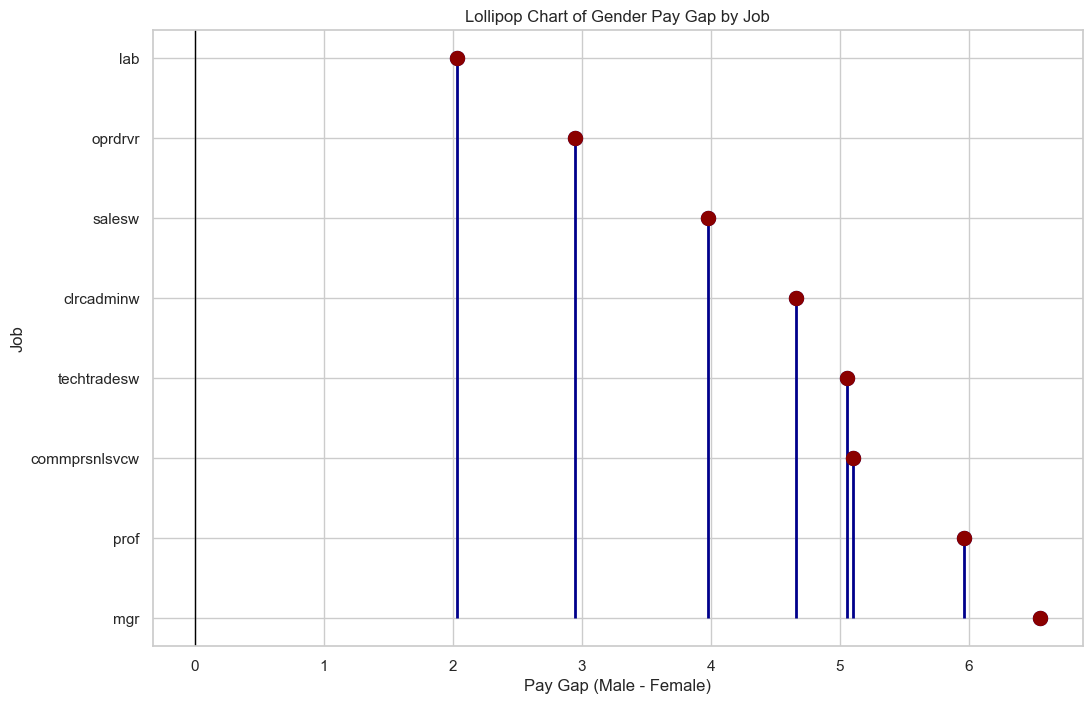

In [57]:
# Lollipop chart for pay gap by job
plt.figure(figsize=(12, 8))
markerline, stemlines, baseline = plt.stem(gender_pay_gap['Pay Gap'], gender_pay_gap.index, basefmt=" ")
plt.setp(stemlines, 'linewidth', 2, 'color', 'darkblue')  
plt.setp(markerline, 'color', 'darkblue', 'markersize', 10)  
plt.scatter(gender_pay_gap['Pay Gap'], gender_pay_gap.index, color='darkred', s=100, zorder=3)
plt.axvline(0, color='black', linewidth=1)
plt.title('Lollipop Chart of Gender Pay Gap by Job')
plt.xlabel('Pay Gap (Male - Female)')
plt.ylabel('Job')
plt.show()

# Top 10 highest paying jobs

In [59]:
top_jobs = finaldf.groupby('job')['salary'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 highest paying jobs:")
top_jobs


Top 10 highest paying jobs:


job
prof             39.933810
mgr              39.511429
clrcadminw       28.504762
techtradesw      26.100952
oprdrvr          25.552143
commprsnlsvcw    24.827143
salesw           21.444286
lab              21.063571
Name: salary, dtype: float64

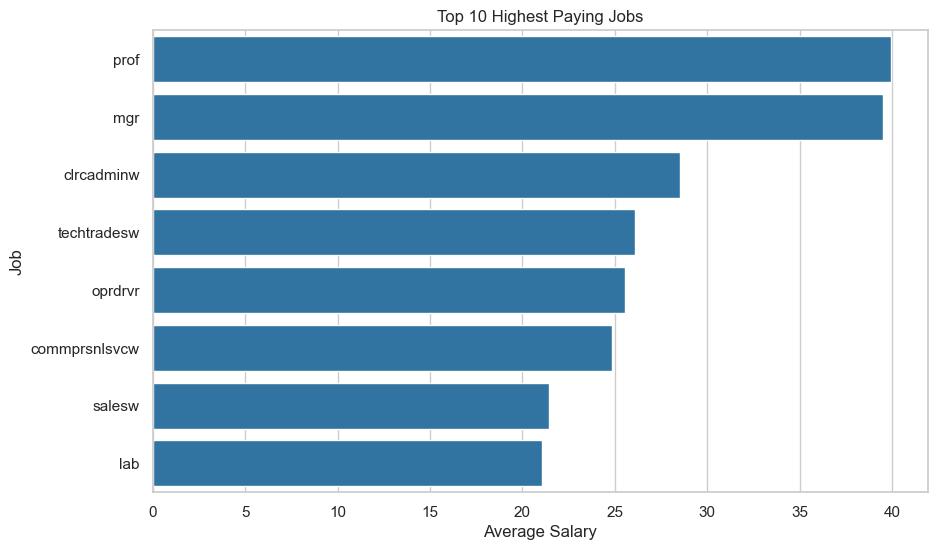

In [60]:
top_jobs = finaldf.groupby('job')['salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title('Top 10 Highest Paying Jobs')
plt.xlabel('Average Salary')
plt.ylabel('Job')
plt.show()

# Gender representation in top 10 highest paying jobs

In [62]:
top_jobs_df = finaldf[finaldf['job'].isin(top_jobs.index)]
gender_representation_top_jobs = top_jobs_df.groupby(['job', 'gender']).size().unstack()
print("\nGender representation in top 10 highest paying jobs:")
gender_representation_top_jobs


Gender representation in top 10 highest paying jobs:


gender,Females,Males,Persons
job,,,
clrcadminw,14,14,14
commprsnlsvcw,14,14,14
lab,14,14,14
mgr,14,14,14
oprdrvr,14,14,14
prof,14,14,14
salesw,14,14,14
techtradesw,14,14,14


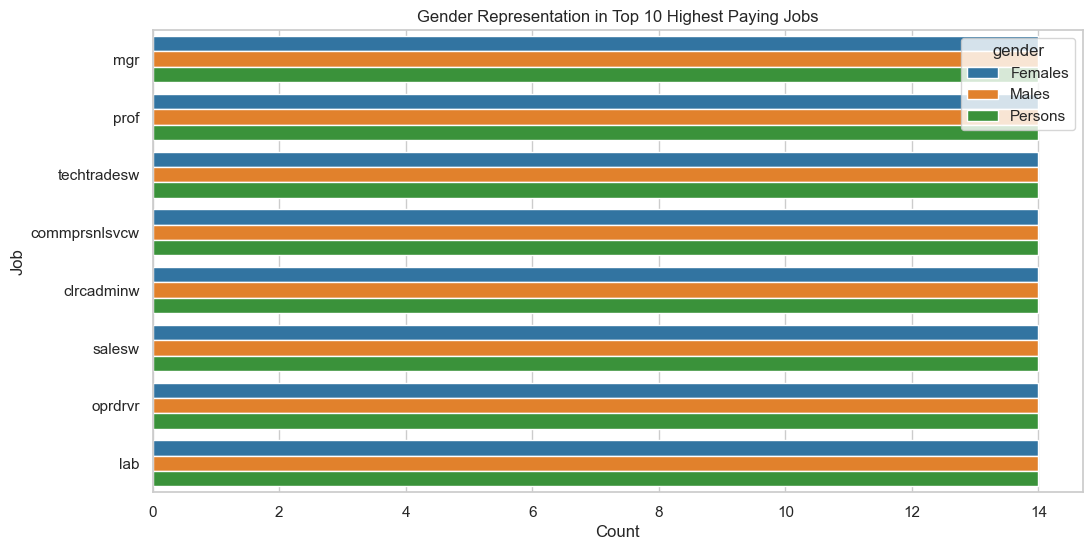

In [63]:
top_jobs_df = finaldf[finaldf['job'].isin(top_jobs.index)]
plt.figure(figsize=(12, 6))
sns.countplot(y='job', hue='gender', data=top_jobs_df)
plt.title('Gender Representation in Top 10 Highest Paying Jobs')
plt.ylabel('Job')
plt.xlabel('Count')
plt.show()

This is not really surprising since there is an equal amount of individuals in all genders

# Average salary by job and gender

In [66]:
avg_salary_job_gender = finaldf.groupby(['job', 'gender'])['salary'].mean().unstack()
print("\nAverage salary by job and gender:")
avg_salary_job_gender


Average salary by job and gender:


gender,Females,Males,Persons
job,,,
clrcadminw,26.558571,31.219286,27.736429
commprsnlsvcw,22.597857,27.697143,24.186429
lab,19.953571,21.987143,21.250000
mgr,35.964286,42.518571,40.051429
oprdrvr,23.685000,26.629286,26.342143
prof,37.065714,43.027143,39.708571
salesw,19.630714,23.610000,21.092143
techtradesw,22.979286,28.033571,27.290000


<Figure size 1200x800 with 0 Axes>

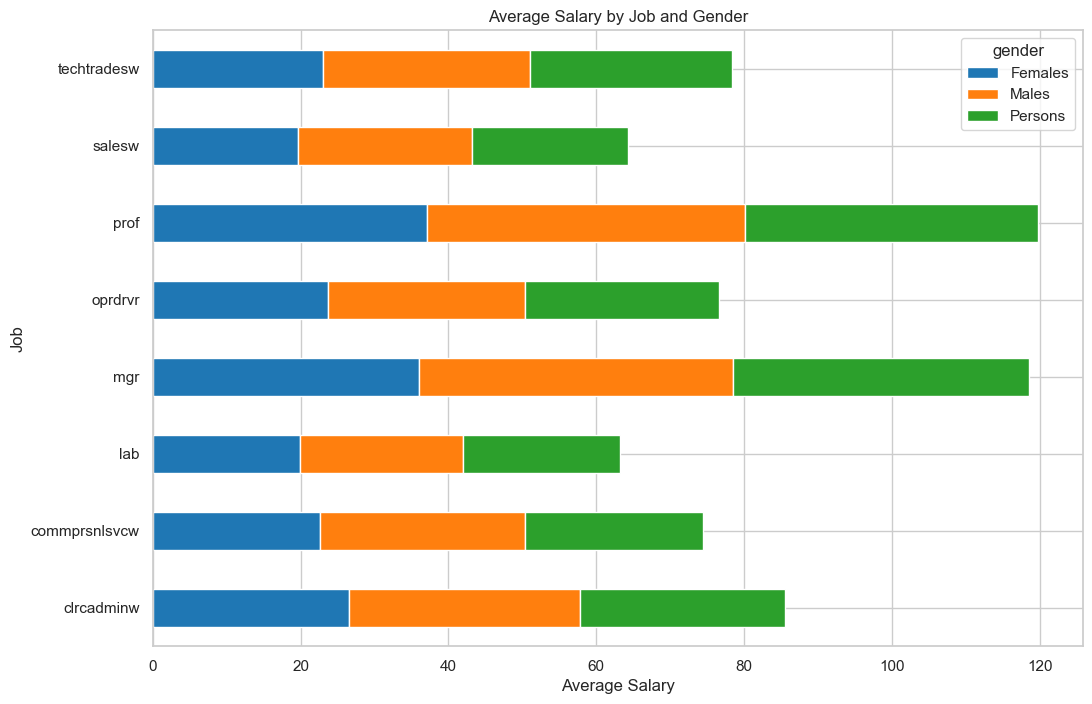

In [67]:
avg_salary_job_gender = finaldf.groupby(['job', 'gender'])['salary'].mean().unstack()
plt.figure(figsize=(12, 8))
avg_salary_job_gender.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Average Salary by Job and Gender')
plt.xlabel('Average Salary')
plt.ylabel('Job')
plt.show()

# Salary Growth Rate Over the Years

In [69]:
# Calculate the year-over-year salary growth rate
avg_salary_year['Salary Growth Rate (%)'] = avg_salary_year['salary'].pct_change() * 100
print("Year-over-year salary growth rate:")
avg_salary_year

Year-over-year salary growth rate:


,year,salary,Salary Growth Rate (%)
0,2004,21.895833,NaN
1,2005,22.687500,3.615604
2,2006,23.166667,2.112029
3,2007,25.218750,8.857914
4,2008,25.847500,2.493185
5,2009,26.305417,1.771609
6,2010,27.708333,5.333185
7,2011,28.780417,3.869173
8,2012,29.857917,3.743865
9,2013,30.346250,1.635524


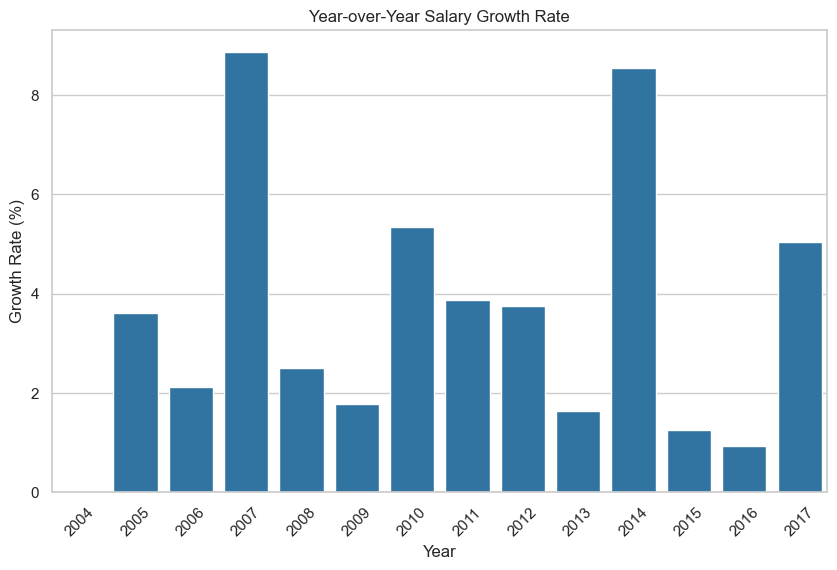

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='Salary Growth Rate (%)', data=avg_salary_year)
plt.title('Year-over-Year Salary Growth Rate')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

# Gender Representation Over the Years
Again, due to the equal distribution of the genders, we can't really get much insight here. I'll still leave it here for future reference

In [72]:
gender_representation_year = finaldf.groupby(['year', 'gender']).size().unstack()
print("\nGender representation over the years:")
gender_representation_year


Gender representation over the years:


gender,Females,Males,Persons
year,,,
2004,8,8,8
2005,8,8,8
2006,8,8,8
2007,8,8,8
2008,8,8,8
2009,8,8,8
2010,8,8,8
2011,8,8,8
2012,8,8,8


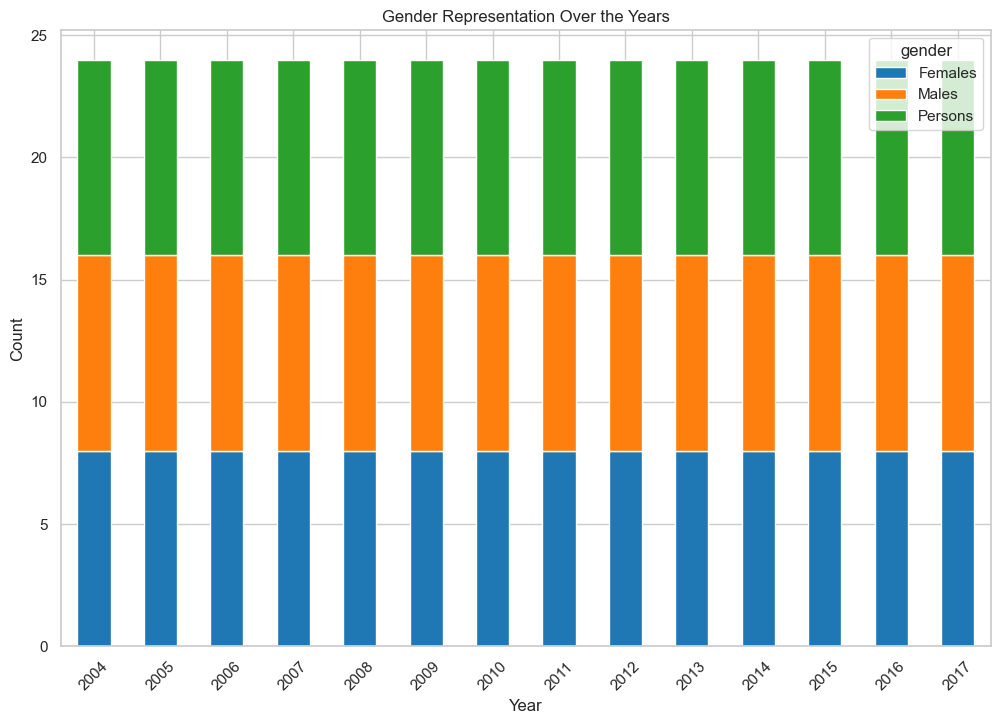

In [73]:
gender_representation_year.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Gender Representation Over the Years')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

# Jobs with the Highest Gender Pay Gap

In [75]:
top_pay_gap = gender_pay_gap.sort_values('Pay Gap', ascending=False).head(10)
print("\nJobs with the highest gender pay gap (Male - Female):")
top_pay_gap


Jobs with the highest gender pay gap (Male - Female):


gender,Females,Males,Persons,Pay Gap
job,,,,
mgr,35.964286,42.518571,40.051429,6.554286
prof,37.065714,43.027143,39.708571,5.961429
commprsnlsvcw,22.597857,27.697143,24.186429,5.099286
techtradesw,22.979286,28.033571,27.290000,5.054286
clrcadminw,26.558571,31.219286,27.736429,4.660714
salesw,19.630714,23.610000,21.092143,3.979286
oprdrvr,23.685000,26.629286,26.342143,2.944286
lab,19.953571,21.987143,21.250000,2.033571


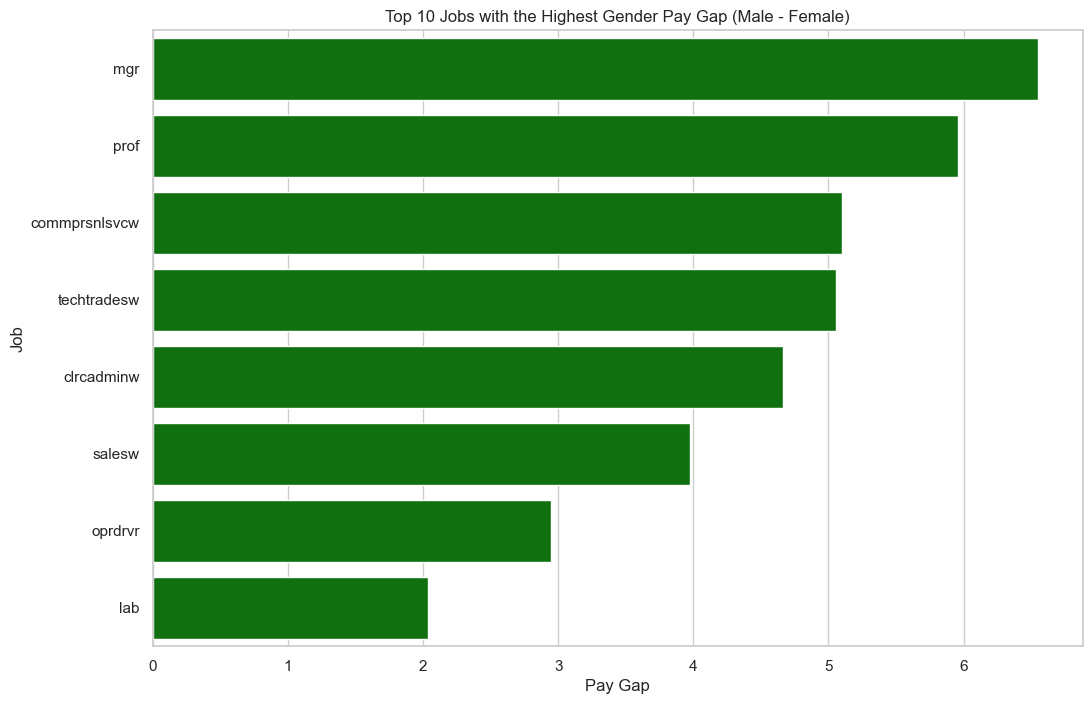

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Pay Gap', y=top_pay_gap.index, data=top_pay_gap.reset_index(), color='green')
plt.title('Top 10 Jobs with the Highest Gender Pay Gap (Male - Female)')
plt.xlabel('Pay Gap')
plt.ylabel('Job')
plt.show()

# Salary Distribution by Job and Year

In [78]:
avg_salary_job_year = finaldf.groupby(['job', 'year'])['salary'].mean().unstack()
print("\nAverage salary by job and year:")
avg_salary_job_year


Average salary by job and year:


year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
job,,,,,,,,,,,,,,
clrcadminw,21.323333,22.200000,23.566667,25.466667,25.490000,25.663333,27.823333,29.310000,30.240000,30.700000,33.310000,33.363333,34.626667,35.983333
commprsnlsvcw,19.406667,20.106667,20.540000,21.910000,25.523333,22.783333,24.153333,24.640000,25.933333,26.526667,28.043333,28.573333,29.523333,29.916667
lab,16.880000,17.333333,17.326667,18.700000,18.636667,19.023333,20.566667,21.100000,22.720000,23.106667,24.050000,24.250000,24.990000,26.206667
mgr,29.920000,30.866667,32.193333,37.743333,35.753333,37.846667,38.140000,39.903333,40.586667,41.366667,46.353333,45.783333,47.260000,49.443333
oprdrvr,19.193333,21.206667,19.910000,21.216667,22.433333,23.983333,25.603333,25.606667,27.286667,28.070000,30.246667,31.283333,29.680000,32.010000
prof,31.423333,32.036667,32.393333,35.263333,36.056667,37.313333,38.383333,40.970000,41.343333,41.880000,47.166667,47.776667,47.230000,49.836667
salesw,16.476667,17.033333,17.916667,18.626667,19.786667,19.666667,20.983333,21.756667,22.490000,22.943333,23.953333,24.753333,26.266667,27.566667
techtradesw,20.543333,20.716667,21.486667,22.823333,23.100000,24.163333,26.013333,26.956667,28.263333,28.176667,30.383333,31.053333,29.763333,31.970000


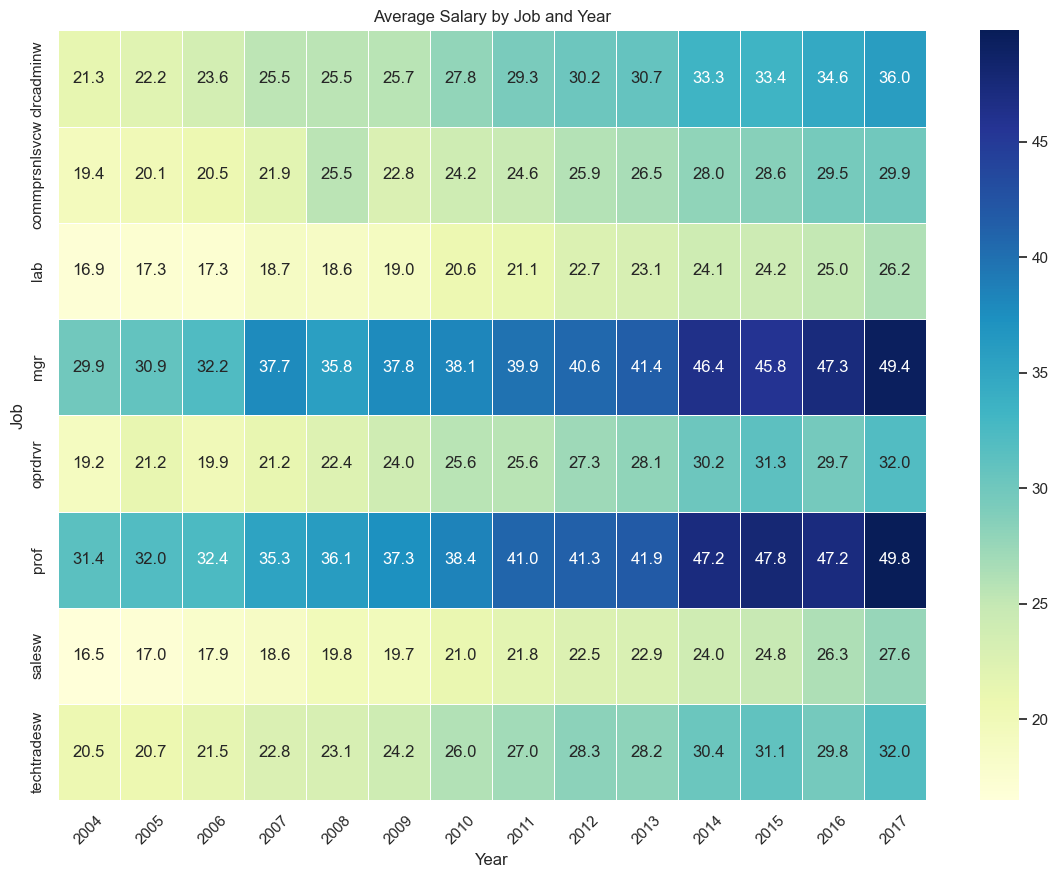

In [79]:
plt.figure(figsize=(14, 10))
sns.heatmap(avg_salary_job_year, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Salary by Job and Year')
plt.ylabel('Job')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

# Highest and Lowest Paying Jobs by Gender

In [81]:
unique_genders = finaldf['gender'].unique()
print("Unique values in 'gender' column:", unique_genders)

Unique values in 'gender' column: ['Females' 'Males' 'Persons']


## Highest paying jobs

In [83]:
highest_paying_jobs_male = finaldf[finaldf['gender'] == 'Males'].groupby('job')['salary'].mean().sort_values(ascending=False).head(10)
highest_paying_jobs_female = finaldf[finaldf['gender'] == 'Females'].groupby('job')['salary'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 highest paying jobs for males:")
print(highest_paying_jobs_male)

print("\nTop 10 highest paying jobs for females:")
print(highest_paying_jobs_female)


Top 10 highest paying jobs for males:
job
prof             43.027143
mgr              42.518571
clrcadminw       31.219286
techtradesw      28.033571
commprsnlsvcw    27.697143
oprdrvr          26.629286
salesw           23.610000
lab              21.987143
Name: salary, dtype: float64

Top 10 highest paying jobs for females:
job
prof             37.065714
mgr              35.964286
clrcadminw       26.558571
oprdrvr          23.685000
techtradesw      22.979286
commprsnlsvcw    22.597857
lab              19.953571
salesw           19.630714
Name: salary, dtype: float64


In [84]:
# Lowest paying jobs

In [85]:
lowest_paying_jobs_male = finaldf[finaldf['gender'] == 'Males'].groupby('job')['salary'].mean().sort_values().head(10)
lowest_paying_jobs_female = finaldf[finaldf['gender'] == 'Females'].groupby('job')['salary'].mean().sort_values().head(10)
print("\nTop 10 lowest paying jobs for males:")
print(lowest_paying_jobs_male)

print("\nTop 10 lowest paying jobs for females:")
print(lowest_paying_jobs_female)


Top 10 lowest paying jobs for males:
job
lab              21.987143
salesw           23.610000
oprdrvr          26.629286
commprsnlsvcw    27.697143
techtradesw      28.033571
clrcadminw       31.219286
mgr              42.518571
prof             43.027143
Name: salary, dtype: float64

Top 10 lowest paying jobs for females:
job
salesw           19.630714
lab              19.953571
commprsnlsvcw    22.597857
techtradesw      22.979286
oprdrvr          23.685000
clrcadminw       26.558571
mgr              35.964286
prof             37.065714
Name: salary, dtype: float64


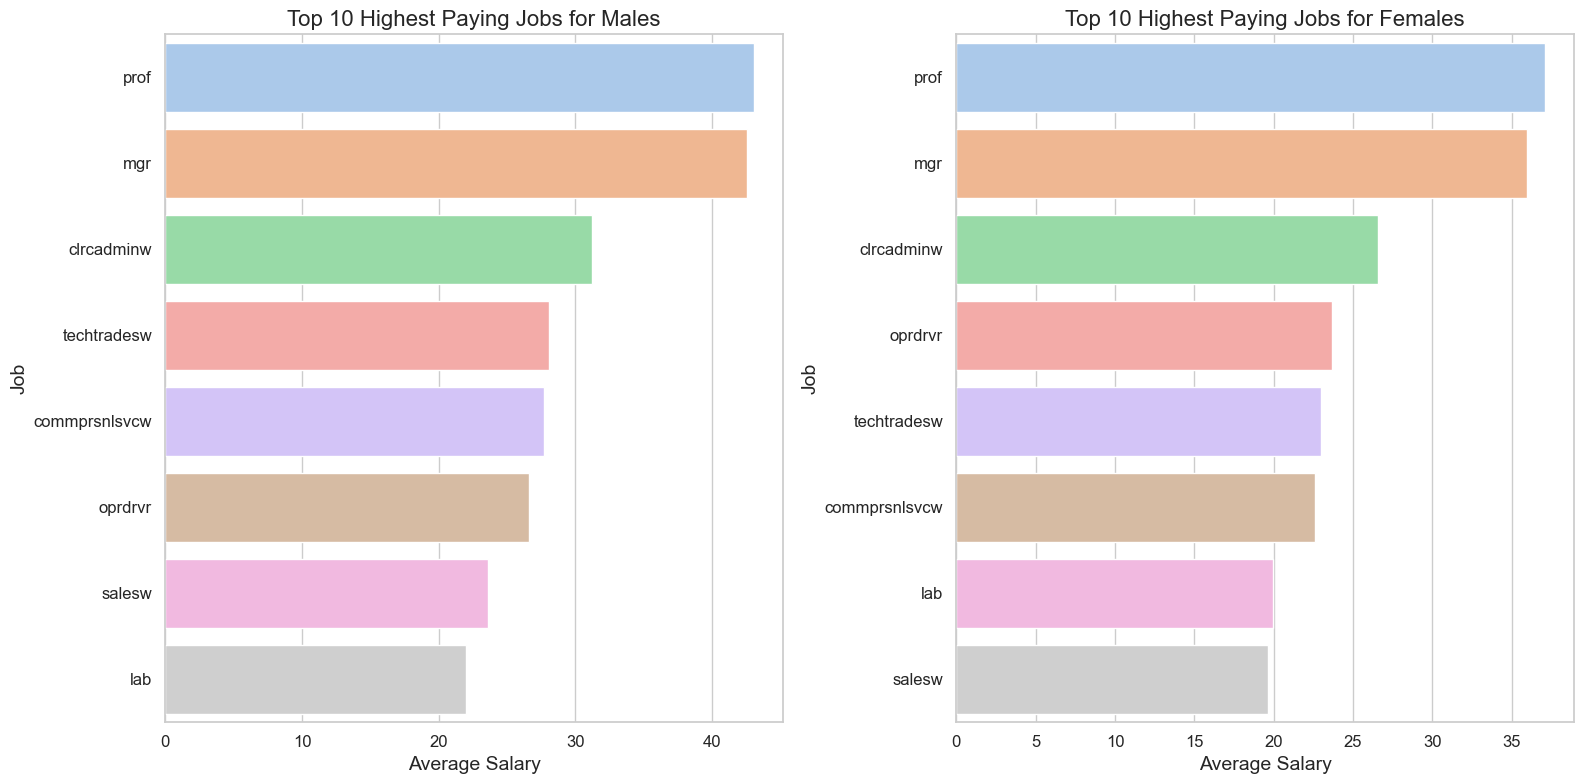

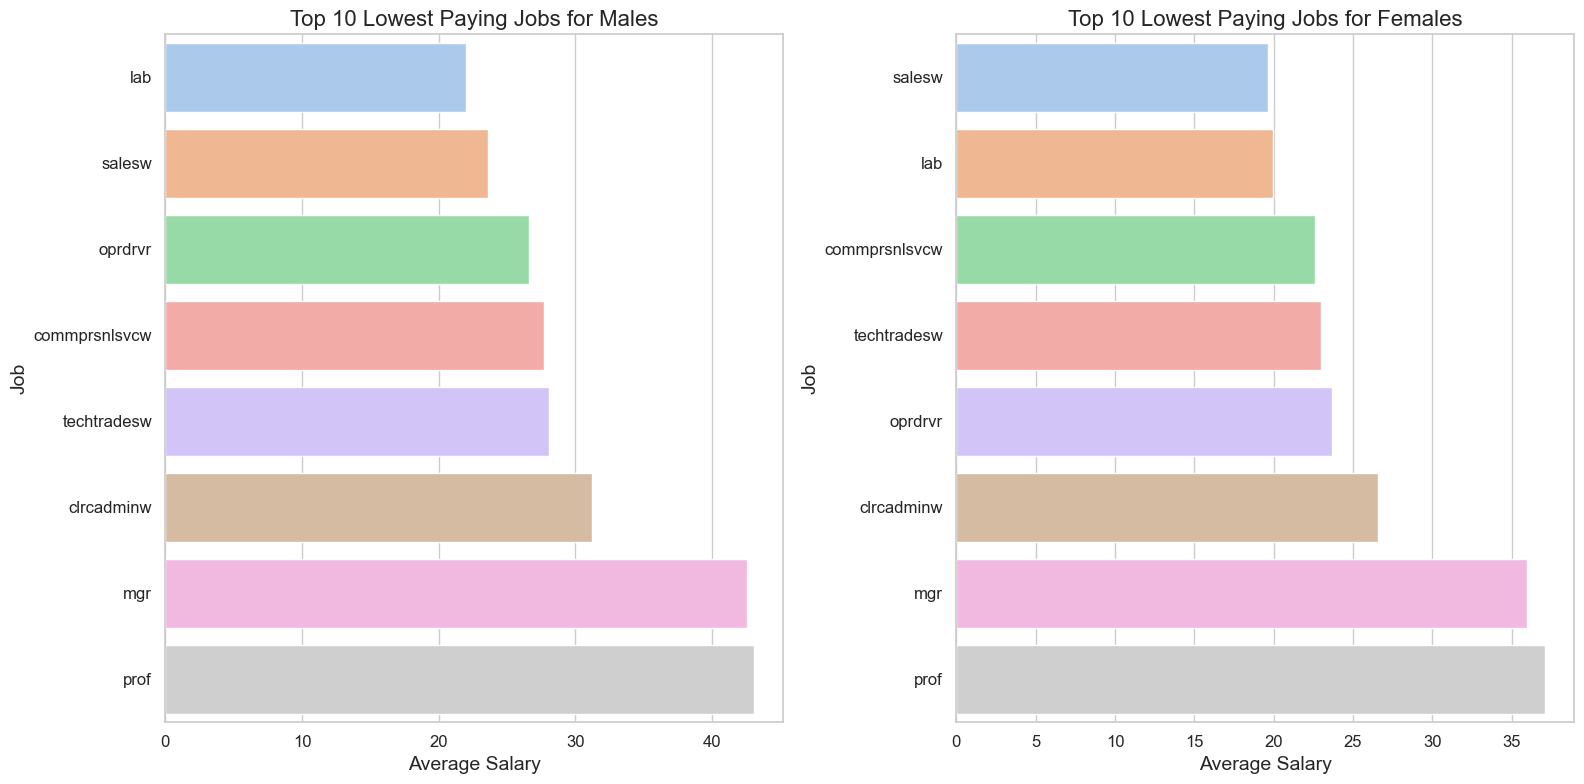

In [86]:
light_palette_male = sns.color_palette("pastel", len(highest_paying_jobs_male))
light_palette_female = sns.color_palette("pastel", len(highest_paying_jobs_female))
plt.figure(figsize=(16, 8))

# Highest paying jobs for males
plt.subplot(1, 2, 1)
sns.barplot(x=highest_paying_jobs_male.values, y=highest_paying_jobs_male.index, hue=highest_paying_jobs_male.index, palette=light_palette_male, dodge=False)
plt.title('Top 10 Highest Paying Jobs for Males', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Job', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)

# Highest paying jobs for females
plt.subplot(1, 2, 2)
sns.barplot(x=highest_paying_jobs_female.values, y=highest_paying_jobs_female.index, hue=highest_paying_jobs_female.index, palette=light_palette_female, dodge=False)
plt.title('Top 10 Highest Paying Jobs for Females', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Job', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

# Visualize lowest paying jobs
plt.figure(figsize=(16, 8))
light_palette_low_male = sns.color_palette("pastel", len(lowest_paying_jobs_male))
light_palette_low_female = sns.color_palette("pastel", len(lowest_paying_jobs_female))

# Lowest paying jobs for males
plt.subplot(1, 2, 1)
sns.barplot(x=lowest_paying_jobs_male.values, y=lowest_paying_jobs_male.index, hue=lowest_paying_jobs_male.index, palette=light_palette_low_male, dodge=False)
plt.title('Top 10 Lowest Paying Jobs for Males', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Job', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False) 

# Lowest paying jobs for females
plt.subplot(1, 2, 2)
sns.barplot(x=lowest_paying_jobs_female.values, y=lowest_paying_jobs_female.index, hue=lowest_paying_jobs_female.index, palette=light_palette_low_female, dodge=False)
plt.title('Top 10 Lowest Paying Jobs for Females', fontsize=16)
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Job', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


# Salary Distribution by Gender and Job for Each Year

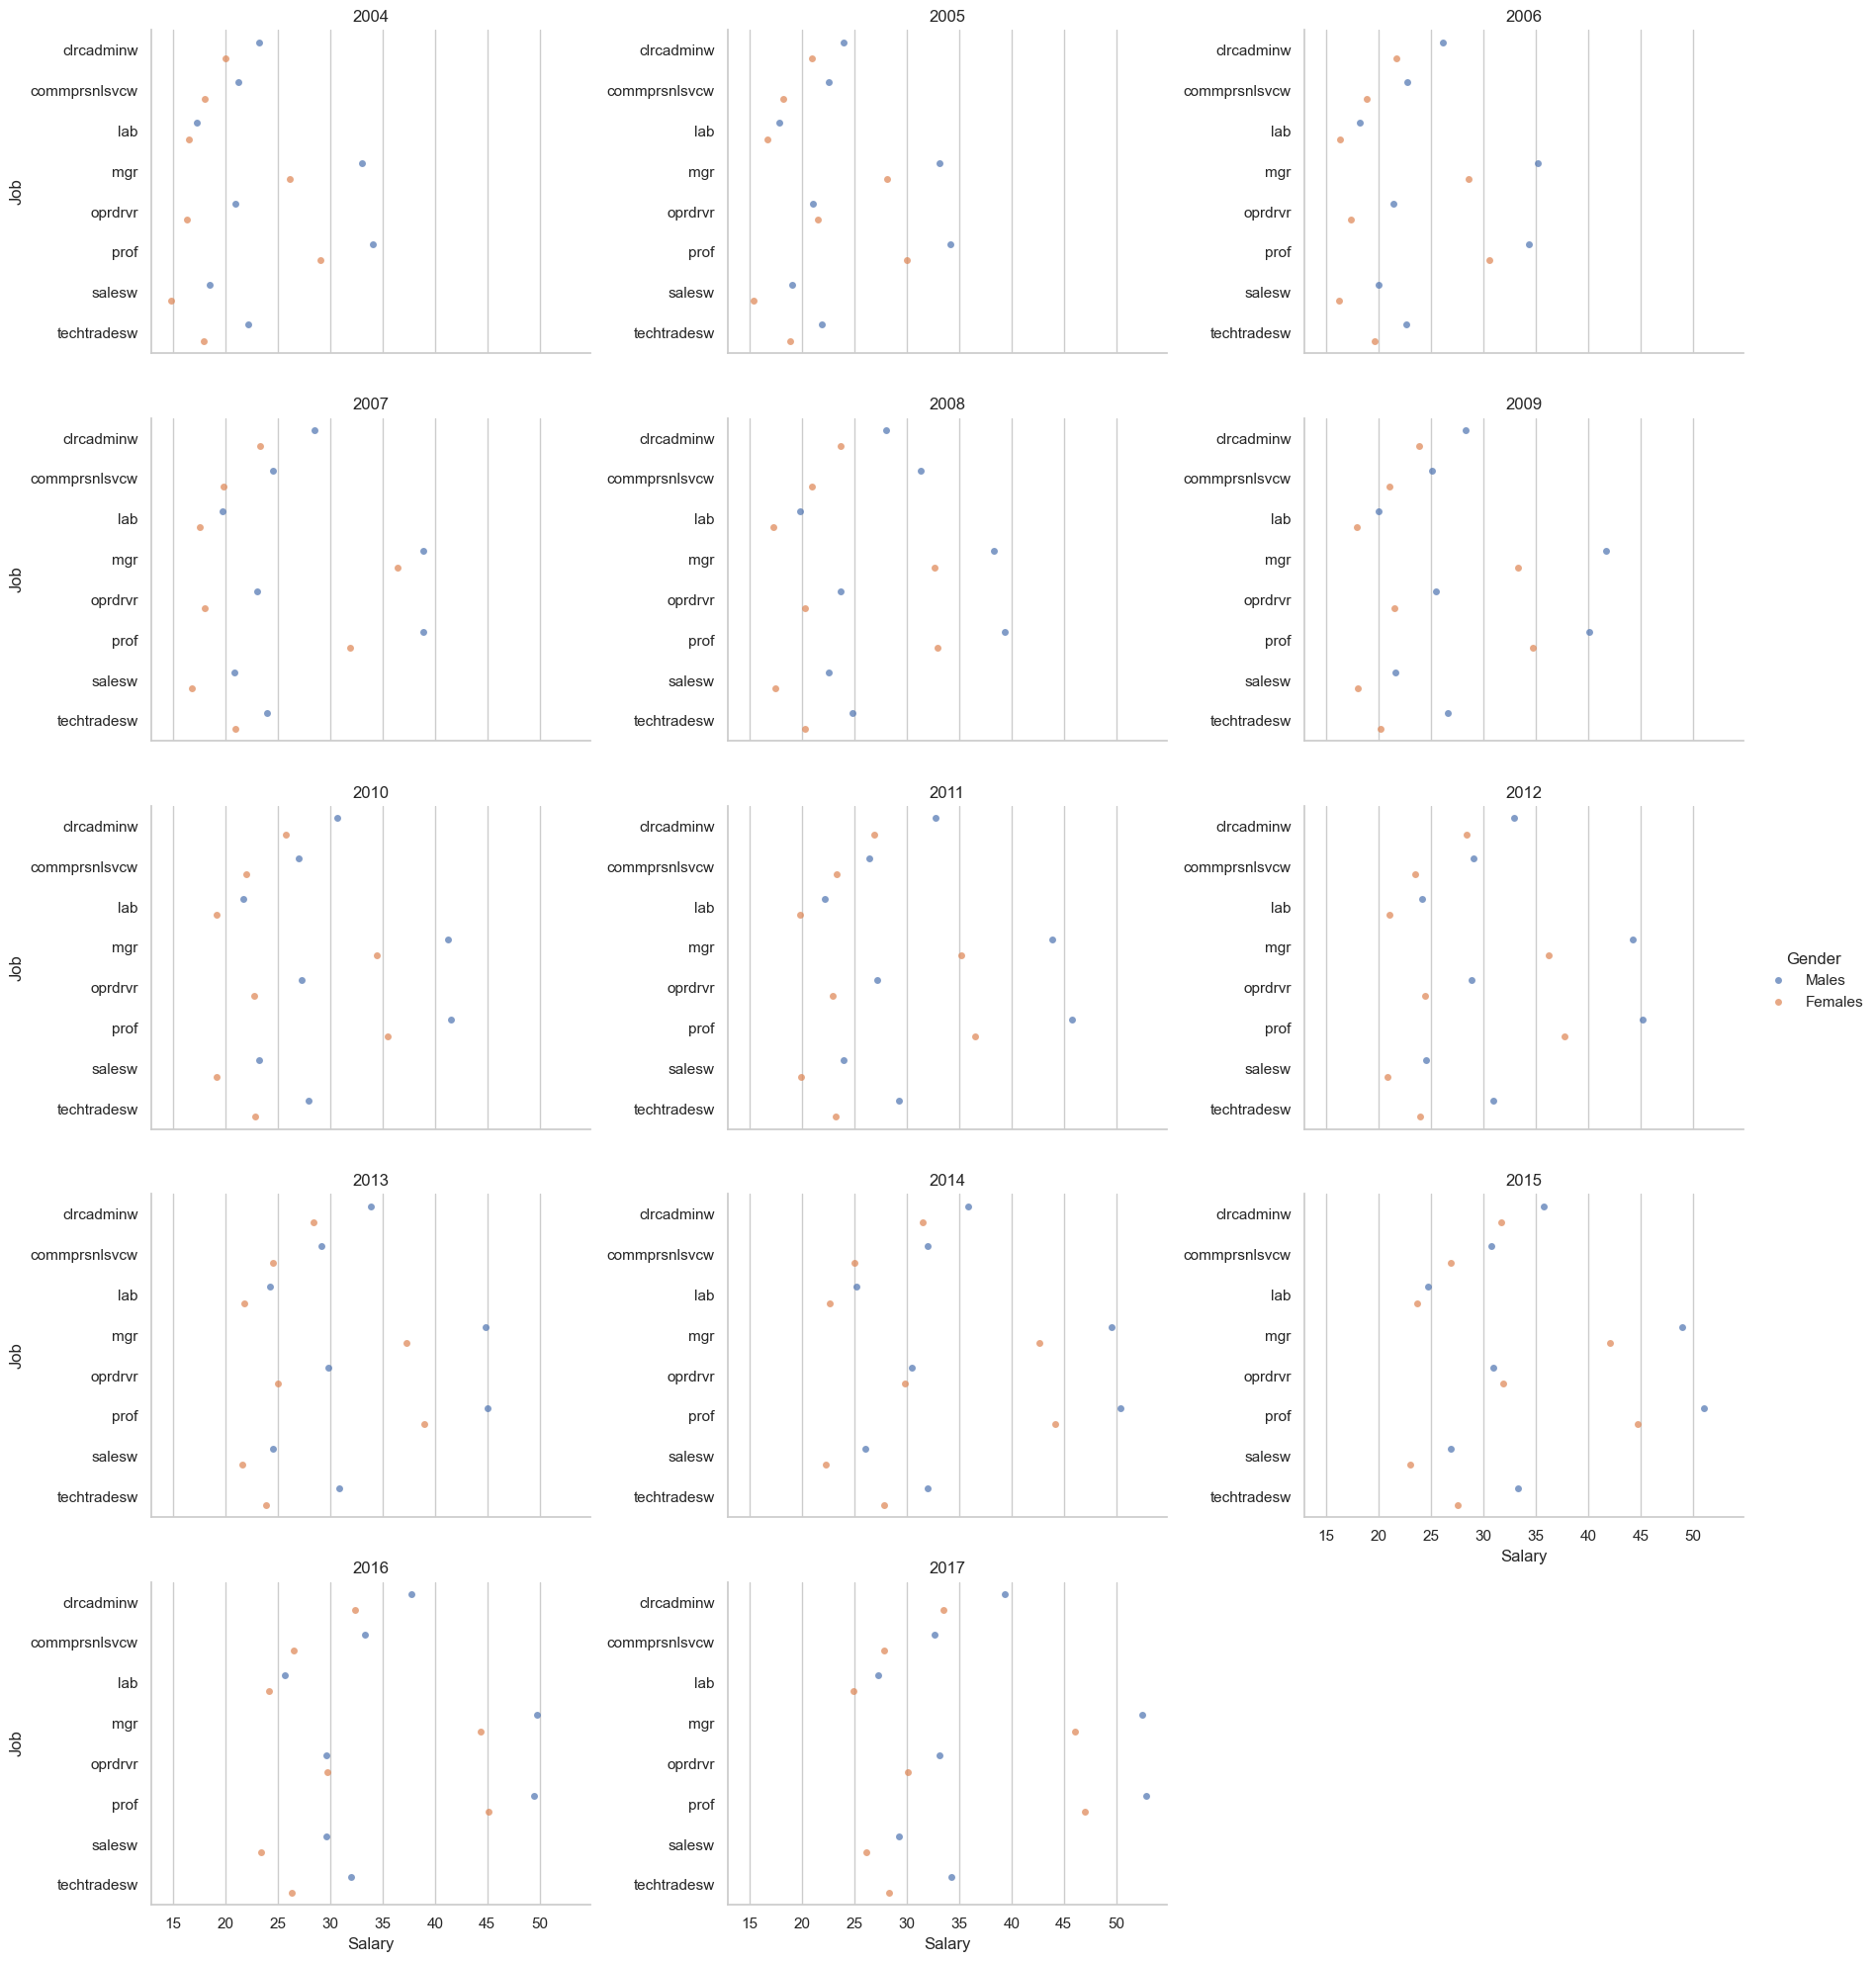

In [88]:
job_order = sorted(finaldf['job'].unique())
hue_order = ['Males', 'Females']
job_order = sorted(finaldf['job'].unique())

g = sns.FacetGrid(finaldf, col="year", col_wrap=3, height=4, aspect=1.5, sharey=False)
g.map(sns.stripplot, "salary", "job", "gender", order=job_order, hue_order=hue_order, dodge=True, palette="deep", alpha=0.7, jitter=True)
g.add_legend(title="Gender")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Salary", "Job")
plt.show()

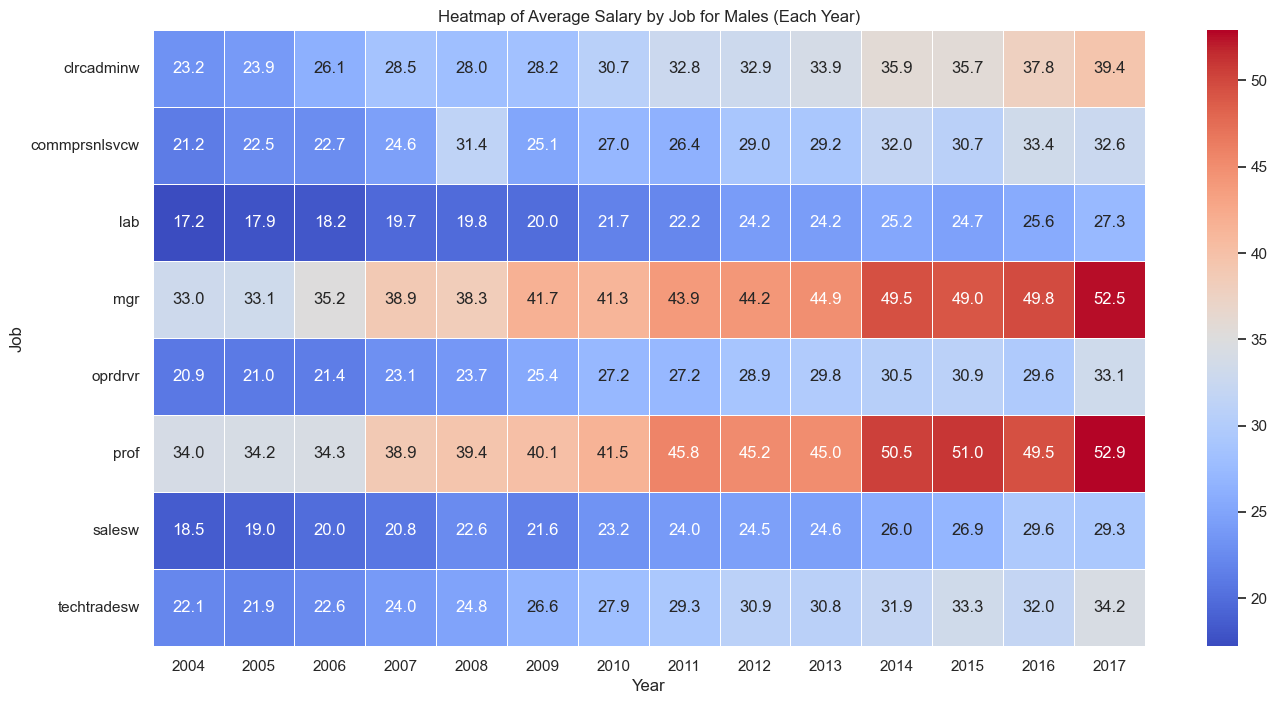

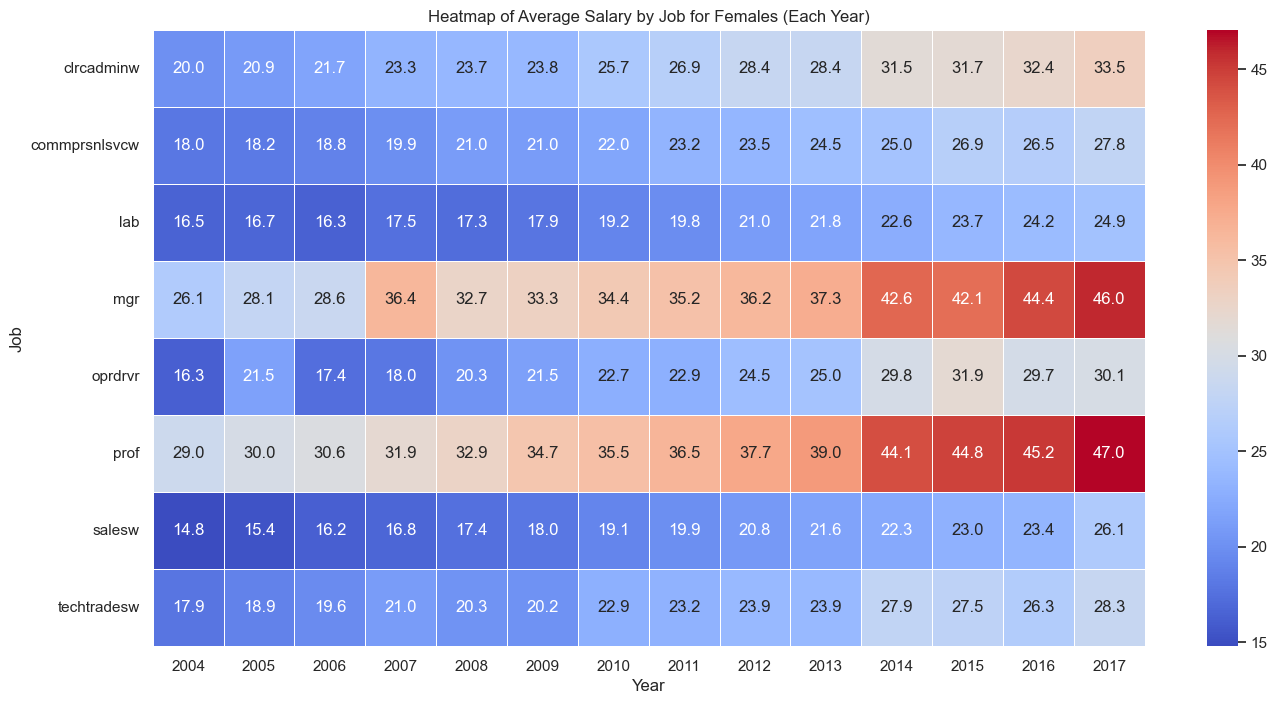

In [89]:
heatmap_data_male = finaldf[finaldf['gender'] == 'Males'].pivot_table(values='salary', index=['job'], columns='year', aggfunc='mean')
heatmap_data_female = finaldf[finaldf['gender'] == 'Females'].pivot_table(values='salary', index=['job'], columns='year', aggfunc='mean')

# Heatmap for males
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data_male, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Average Salary by Job for Males (Each Year)')
plt.xlabel('Year')
plt.ylabel('Job')
plt.show()

# Heatmap for females
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data_female, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Average Salary by Job for Females (Each Year)')
plt.xlabel('Year')
plt.ylabel('Job')
plt.show()


I'll leave this here even though it does not provide much insight. It may be useful in the future

# Salary distribution by gender and job for each year

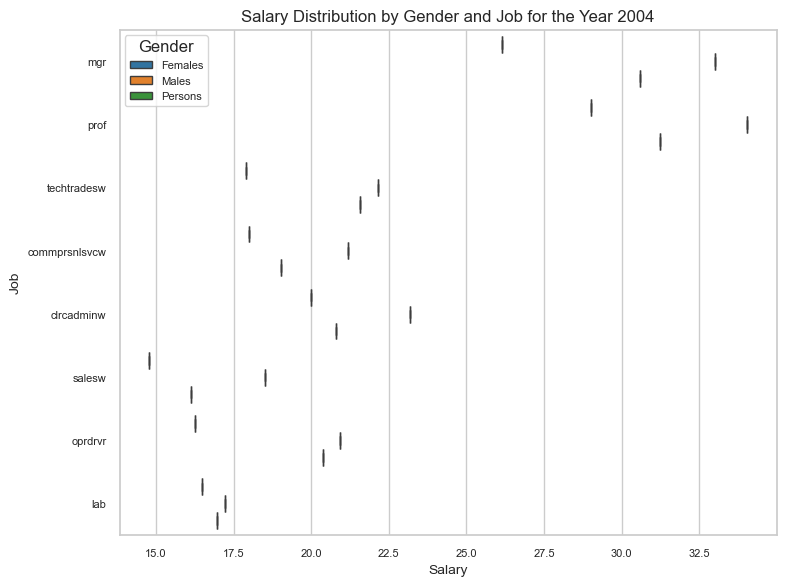

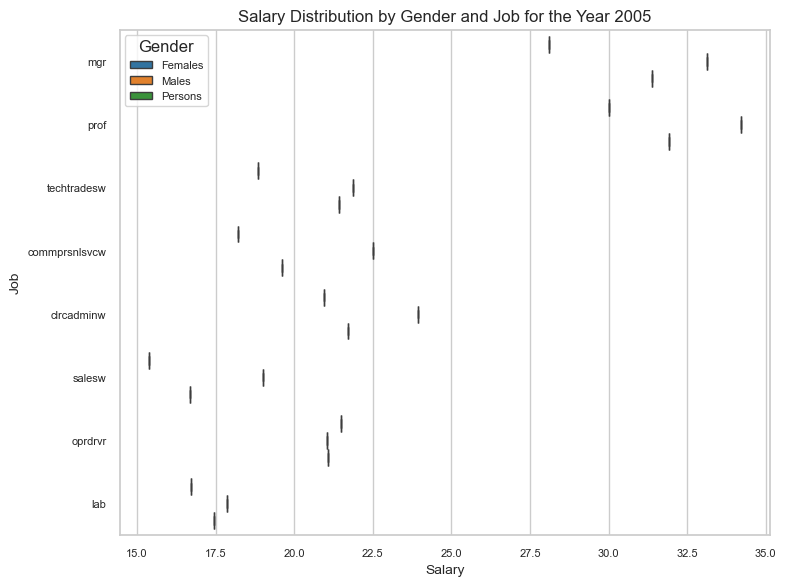

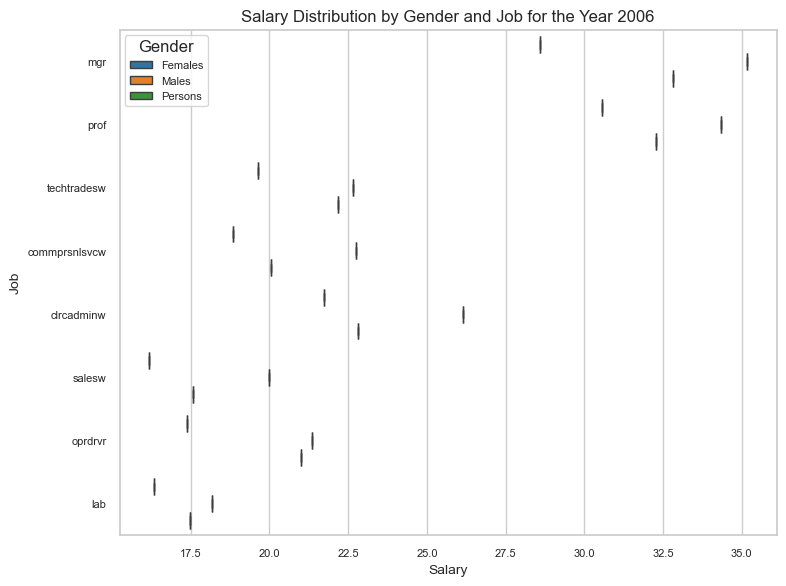

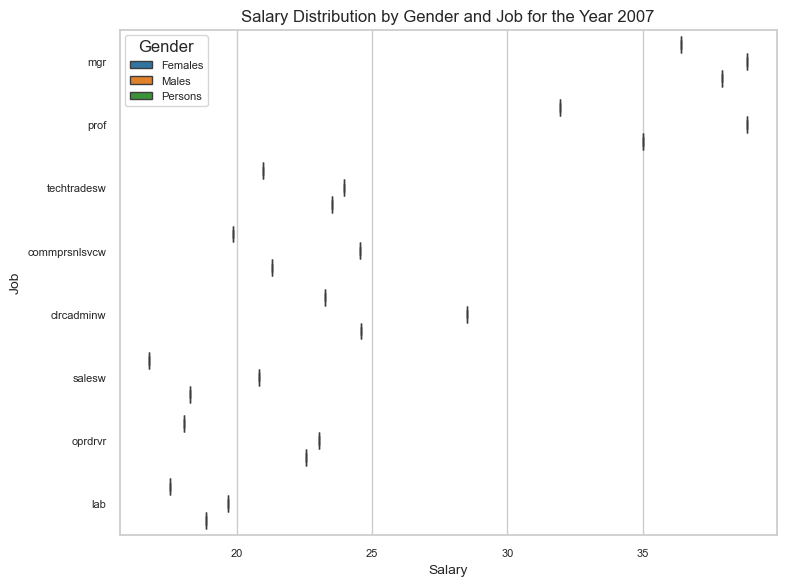

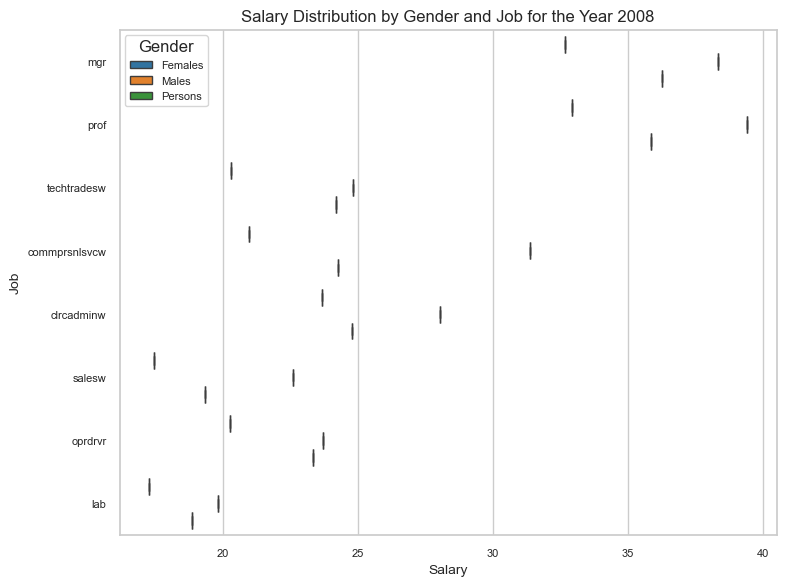

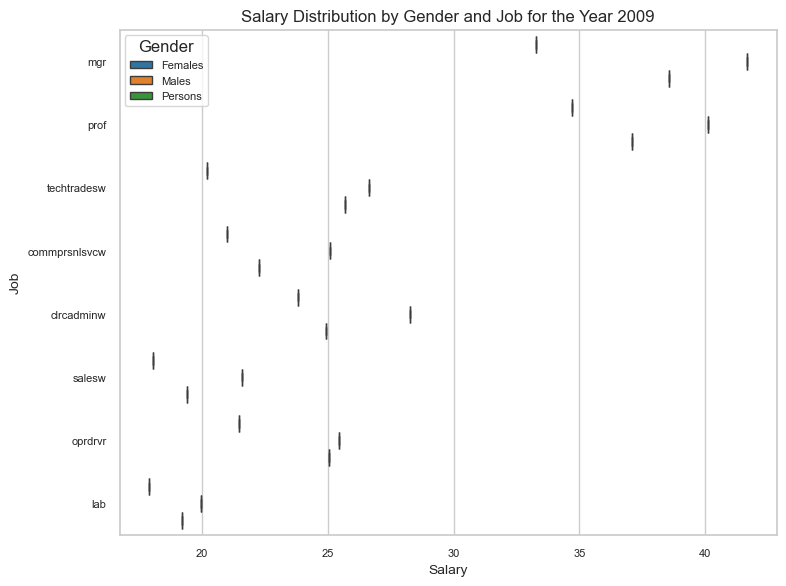

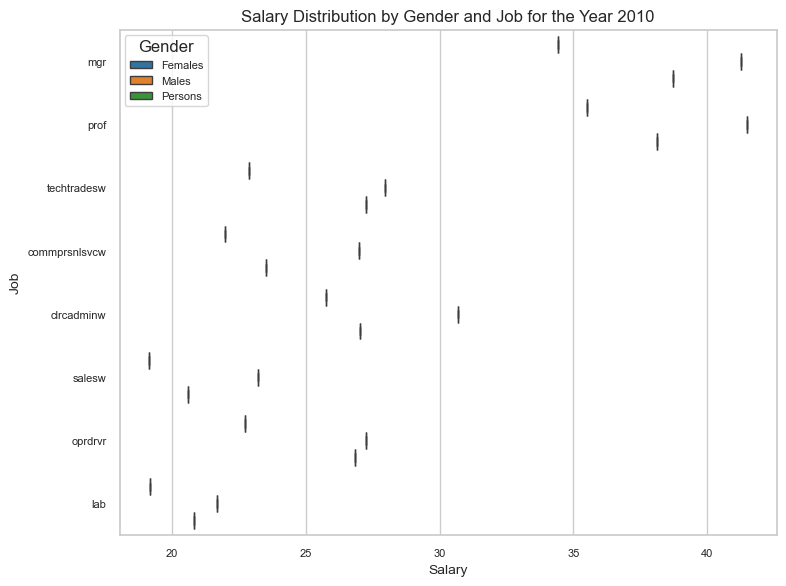

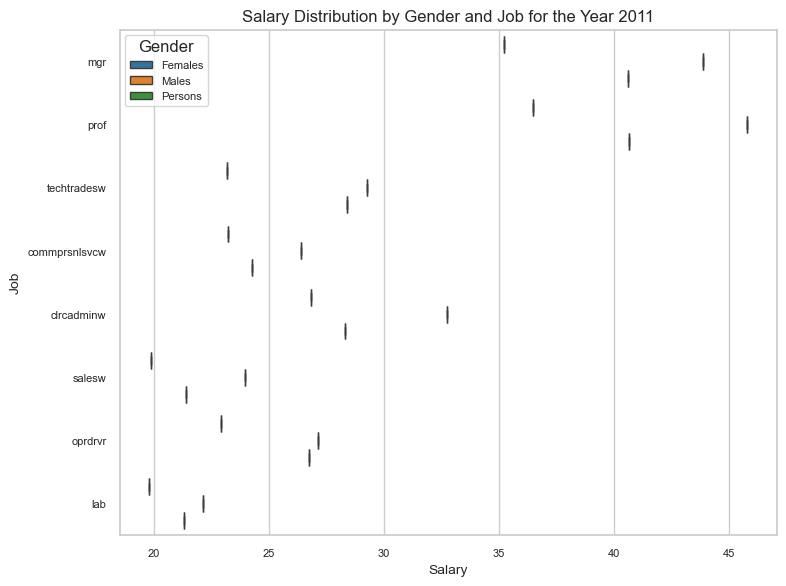

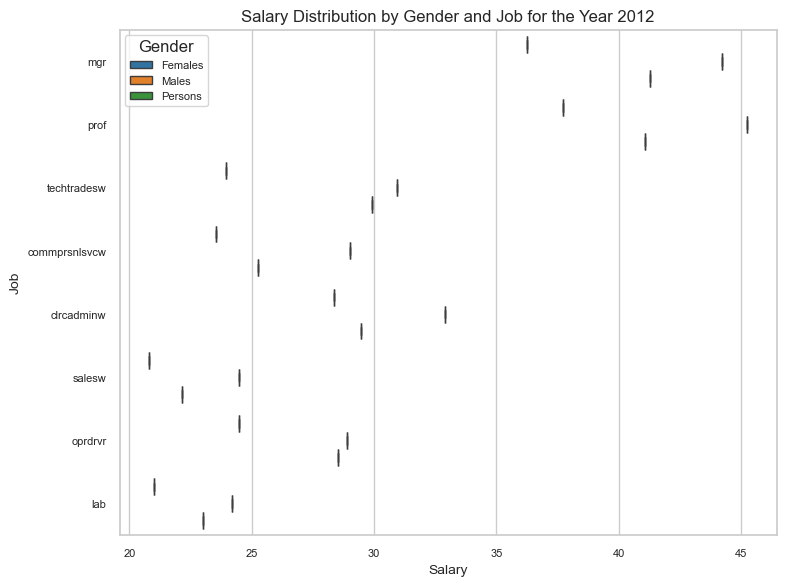

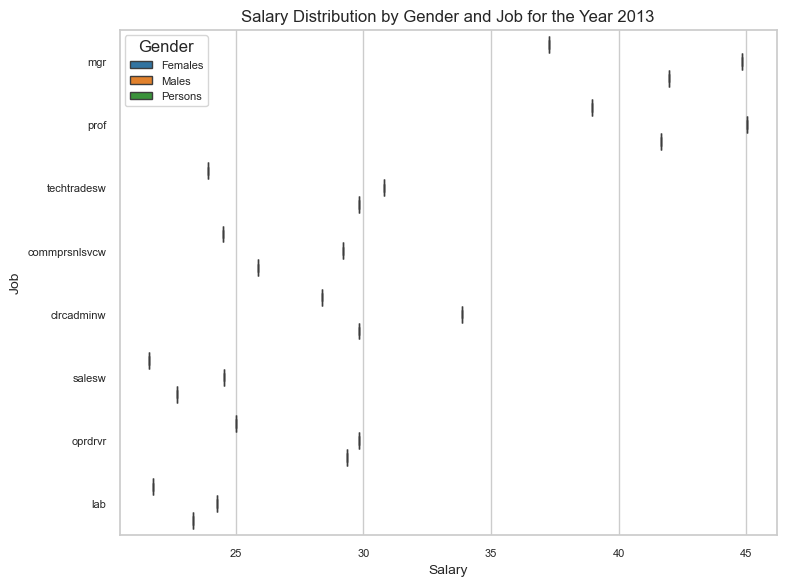

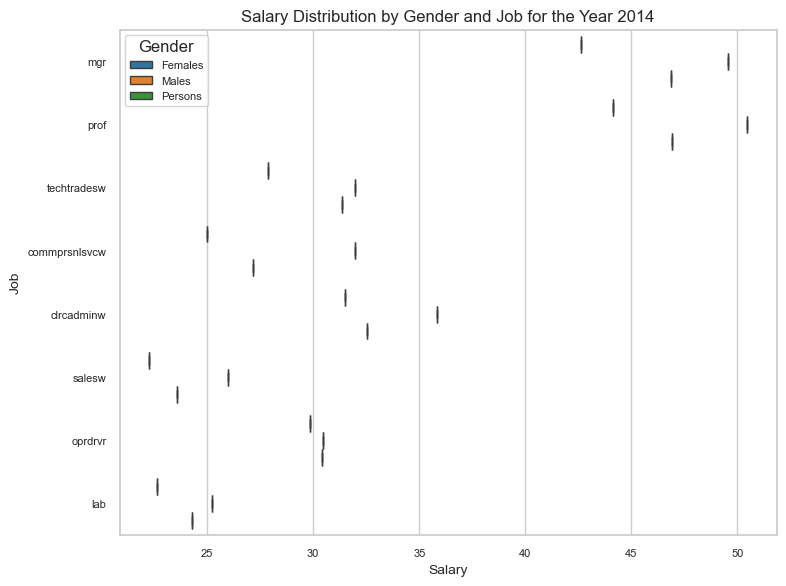

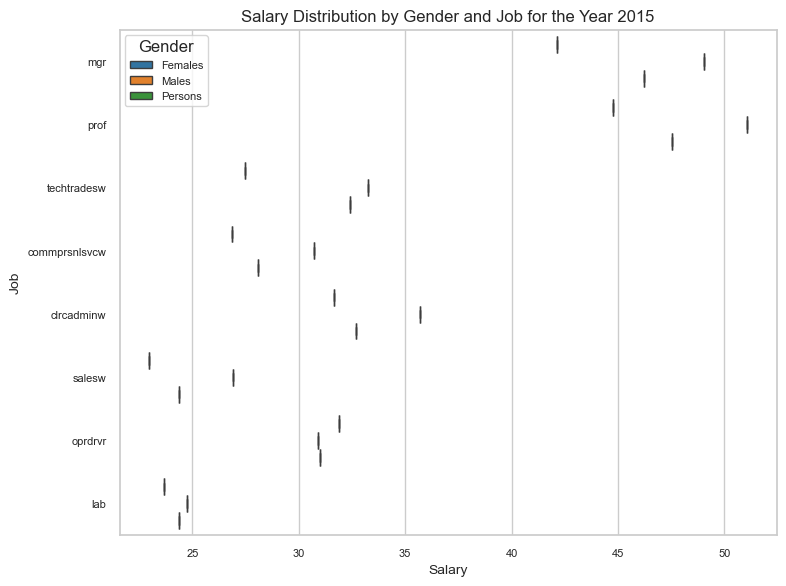

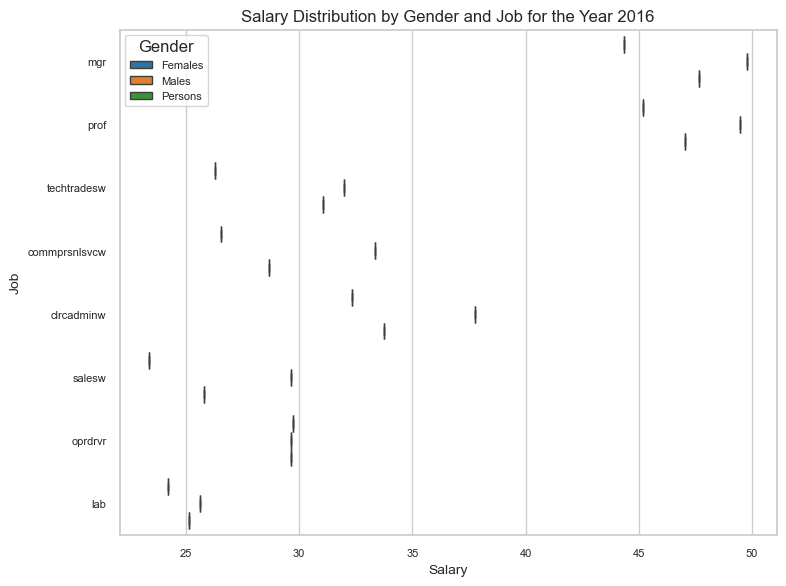

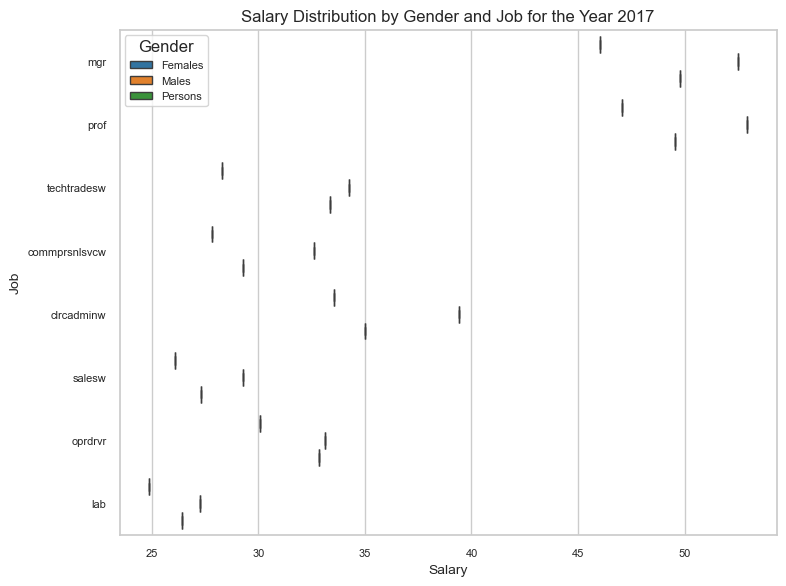

In [92]:
for year in finaldf['year'].unique():
    plt.figure(figsize=(8, 6))  # Further reduced figure size
    sns.boxplot(x='salary', y='job', hue='gender', data=finaldf[finaldf['year'] == year])
    plt.title(f'Salary Distribution by Gender and Job for the Year {year}', fontsize=12)
    plt.xlabel('Salary', fontsize=10)
    plt.ylabel('Job', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend(title='Gender', loc='upper left', fontsize=8)
    plt.tight_layout(pad=1.0)
    plt.show()